# Capstone Project
-supposed to identify how salary is varying with respect to other considerable factors(other colums in the dataset which are considerable and significant)

-dataset should be divided into test and train 

-use the training data to build the model and 

-apply it to test data to measure the performance and robustness of the model.

-the model that has to be used here is a regression model since the prediction has to be made on the output variable salary which is a numerical column


# Importing Required Libraries

In [2947]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
import klib
from pandas_profiling import ProfileReport

# Loading the Dataset

In [2875]:
#loading the given dataset into df
df=pd.read_csv("New_data_Set.csv")

# Preparing a profile report 
which gives the summary of the dataset 

In [2948]:
pf=ProfileReport(df)
pf.to_file('report_of_capstone_project.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Displaying The Top 5 Rows

In [2876]:
df.head(5)

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


# Displaying The last 5 Rows

In [2877]:
df.tail(5)

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,72278.720,9034.840,629.511067,3927000,NaN,293.838840,310.955001,117.80,,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,74274.360,9284.295,627.841071,6031900,NaN,301.311314,309.610028,118.60,,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,77054.720,9631.840,625.860033,7949400,NaN,306.040009,303.483494,118.60,,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,78388.280,9798.535,629.510005,3908400,NaN,308.579987,312.432438,118.65,,72,PG
4999,Male,0,Yes,Yes,Two year,Yes,No,88,199970.74,79988.296,9998.537,627.839984,6003300,NaN,312.307316,311.081089,118.75,,72,PG


From the above display ,we can infer that there are 

NaN values in the opening balance column and 

Empty values in the Total_Sales Column

Which has to be addressed while cleaning/processing the columns in the dataset

# To Know The Size,Shape and No.of Columns in the given Dataset

In [2878]:
print("size of the dataset",df.size)
print("shape of the dataset",df.shape)
print("total no.of columns in the datset",len(df.columns))
print("total no.of rows in the dataset",df.shape[0])

size of the dataset 100000
shape of the dataset (5000, 20)
total no.of columns in the datset 20
total no.of rows in the dataset 5000


# Column names

In [2879]:
df.columns

Index(['Gender', 'Business', 'Dependancies', 'Calls', 'Type', 'Billing',
       'Rating', 'Age', 'Salary', 'Base_pay', 'Bonus', 'Unit_Price', 'Volume',
       'openingbalance', 'closingbalance', 'low', 'Unit_Sales', 'Total_Sales',
       'Months', 'Education'],
      dtype='object')

# Data Types of Columns

In [2880]:
df.dtypes

Gender             object
Business            int64
Dependancies       object
Calls              object
Type               object
Billing            object
Rating             object
Age                 int64
Salary            float64
Base_pay          float64
Bonus             float64
Unit_Price        float64
Volume              int64
openingbalance    float64
closingbalance    float64
low               float64
Unit_Sales        float64
Total_Sales        object
Months              int64
Education          object
dtype: object

# Numerical Columns 

In [2881]:
df.select_dtypes(include=['int64','float']).dtypes

Business            int64
Age                 int64
Salary            float64
Base_pay          float64
Bonus             float64
Unit_Price        float64
Volume              int64
openingbalance    float64
closingbalance    float64
low               float64
Unit_Sales        float64
Months              int64
dtype: object

# Categorical Columns 

In [2882]:
df.select_dtypes(['object']).apply(lambda x: x.astype('category')).dtypes

Gender          category
Dependancies    category
Calls           category
Type            category
Billing         category
Rating          category
Total_Sales     category
Education       category
dtype: object

# To Check for any Null values presence in the column

In [2883]:
df.isnull().any()

Gender            False
Business          False
Dependancies      False
Calls             False
Type              False
Billing           False
Rating            False
Age               False
Salary            False
Base_pay           True
Bonus             False
Unit_Price        False
Volume            False
openingbalance     True
closingbalance    False
low               False
Unit_Sales        False
Total_Sales        True
Months            False
Education         False
dtype: bool

we can see the null values are present in Total_Sales,openingbalance,Base_pay columns

# Concise Summmary Of The Dataset
(column names ,Data types and Non-null count)

In [2884]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4992 non-null   o

# To Check for the Empty values in the Columns 

In [2885]:
df.isin([' ']).sum(axis=0)

Gender            0
Business          0
Dependancies      0
Calls             0
Type              0
Billing           0
Rating            0
Age               0
Salary            0
Base_pay          0
Bonus             0
Unit_Price        0
Volume            0
openingbalance    0
closingbalance    0
low               0
Unit_Sales        0
Total_Sales       8
Months            0
Education         0
dtype: int64

# Converting the Empty Values into Nan Values

In [2886]:
df['Total_Sales'].replace(' ',np.nan,inplace=True)

#sum of Empty values in the Total_Sales Column
print(f"Empty values count after the Conversion into nan values: {df['Total_Sales'].isin([' ']).sum()}")
#sum of Nan values in the Total_Sales Column
print(f"Nan values count after the Conversion into nan values: {df['Total_Sales'].isnull().sum()}")



Empty values count after the Conversion into nan values: 0
Nan values count after the Conversion into nan values: 16


# Columns Data Type Conversion 
Total Sales Column from  Object  to Float64 

let us convert the values in the business column to yes or no for the purpose of data analysis by using map or replace function


In [2887]:
df['Total_Sales']=df['Total_Sales'].apply(pd.to_numeric,errors='coerce').astype('float64')

Since business is a nominal column (categorical) but it is of type int64 datatype ,so for the analysis purpose let us map these values into yes or no

In [2888]:
df['Business']=df['Business'].map({1:'Yes',0:'No'})

In [2889]:
print('Converted datatypes of:')
print('Total_Sales',df['Total_Sales'].dtypes)
print('Business   ',df['Business'].dtypes)

Converted datatypes of:
Total_Sales float64
Business    object


# Missing Values in the DataFrame

## To Know The Null values in Terms of Percentage


In [2890]:
#user_defined function to calculate the missing values percentage
def missing_table(df):
        # Total missing values
        N = df.isnull().sum()
        
        # Converting missing values number into percentage of missing values
        percentage = 100 * df.isnull().sum()/ len(df)
        
        #Concatenating the Null_values count and their percentage into a dataframe
        N=pd.concat([N,percentage],axis=1)
        
        #renaming the columns 
        N=N.rename(columns = {0 : 'Nan_Values Count', 1 : '% of Nan_Values'})
        
        #Fetching only those rows where the missing values count is not zero
        N1=N[N.iloc[:,1]!=0].sort_values(by='Nan_Values Count',ascending=False).round(2)
        
        return N1
    
#Calling the Function missing_table
missing_table(df)


,Nan_Values Count,% of Nan_Values
openingbalance,1476,29.52
Base_pay,23,0.46
Total_Sales,16,0.32


## Heat map visualisation of missing values 

<AxesSubplot:>

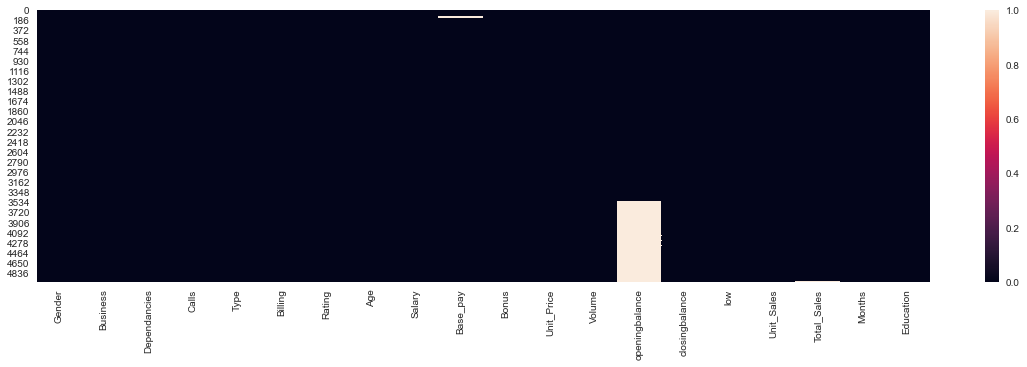

In [2891]:
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull())

As we can see that a patch of data is missing from the opening balance column from the bottom of the table

Also in total sales column small set of data from the last rows is missing 

Regarding Base_pay column the small set of data is missing from the starting rows of the data

##  Bar graph to compare the missing values count among the columns

Text(0.5, 1.0, 'Variables and their Missing_Values_Count')

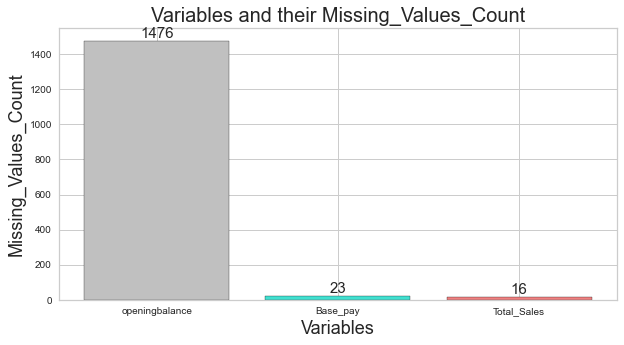

In [2892]:
#missing_table(df).plot(kind='bar')
plt.figure(figsize=(10,5))
m=missing_table(df)
#p=outlier_df.sort_values(by='Percentage',ascending=False).reset_index()
y=m['Nan_Values Count']
x=m.index
color=["silver",'turquoise',"lightcoral",'greenyellow']
plt.bar(x,y,color=color,ec="black")
for i in range(len(y)):
        plt.text(i,y[i],y[i].round(2),ha="center",va="bottom",fontsize=15)
plt.xlabel("Variables",fontsize=18)
plt.ylabel("Missing_Values_Count",fontsize=18)
plt.title(f"Variables and their Missing_Values_Count",fontsize=20)


From the above figure we can infer that the Nan_Values are more in openinigbalance

## Checking for the Distributions of the Variables having  Missing Values

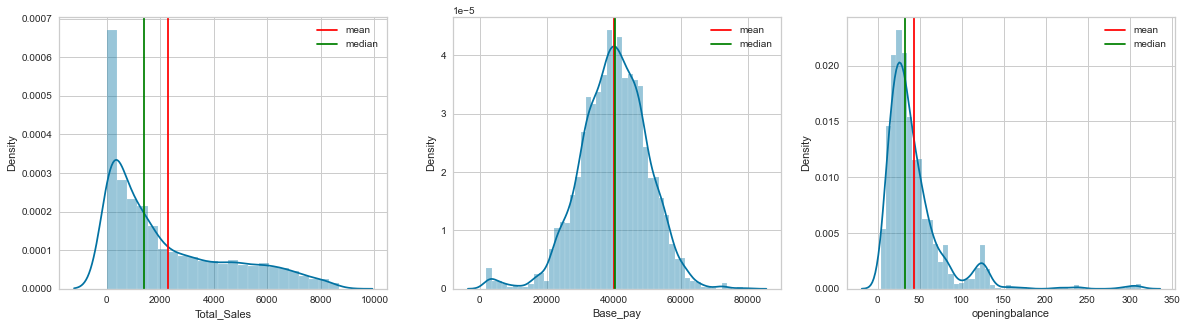

In [2893]:
plt.figure(figsize=(20,5))
def plot_ditribution(df,x):
    #to plot the distributon plot of the given column
    sns.distplot(df[x].dropna())
    
    #to plot the mean line in the distribution plot
    plt.axvline(x=df[x].dropna().mean(),color='red',label='mean')
    
    #to plot the median line in the distribution plot
    plt.axvline(x=df[x].dropna().median(),color='green',label='median')
    
    plt.legend()
    
    
#distribution plot for the Total_Sales Column
plt.subplot(1,3,1)
plot_ditribution(df,'Total_Sales')

#distribution plot for the Base_pay Column
plt.subplot(1,3,2)
plot_ditribution(df,'Base_pay')

#distribution plot for the openingbalance Column
plt.subplot(1,3,3)
plot_ditribution(df,'openingbalance')

plt.show()

From the above Distributions, we can infer that the :
    
    -->Total_Sales Column is a skewed distribution,i.e,right skewed
    
    -->openingbalance Column also has skewness towards right
    
we can consider these columns as non normal distributions so we can use their median values to replace null values in these columns

    -->Base_pay Column is normally distributed 
    
we can consider to replace the null values with mean/median (any one can be used)


# Using Knn imputer to calculate the missing values in the columns

a simple k-nearest neighbor(kNN) model has proven to be effective in calculating the missing values 
than replacing with the zero/average/median values of the column

it provides  more robust and sensitive method for misssing values

in this method the basic principle is: 
    
it identifies the 'k' samples in the dataset that are similar to the missing value row(by default it takes 5 samples)

then these 'k' samples are used to estimate the value of the missing variable

In [2894]:
from sklearn.neighbors import KNeighborsRegressor

def knn_impute(df,target):
    
    df=df.copy()
    #selecting the numerical columns of the dataframe into numeric_col
    numeric_col=df.select_dtypes(np.number)
    
    
    #considering only those columns which doesnt has the null values
    notnull_columns=numeric_col.loc[:,numeric_col.isna().sum()==0].columns
    
    #y_train contains the non null values of the given target column (i.e certain missing column)
    y_train=numeric_col.loc[numeric_col[target].isna()==False,target]
    
    #x_train contains the columns other than the target column (missing column) and
    #the rows of the x_train i.e, for other columns will be the rows where the target column is not null
    x_train=numeric_col.loc[numeric_col[target].isna()==False,notnull_columns]
    
    #x_test contains the columns other than the target column(missing column) and 
    #x_test contains rows that has the target column values as null
    x_test=numeric_col.loc[numeric_col[target].isna()==True,notnull_columns]
    
    #calling the regressor and giving name as knn
    knn=KNeighborsRegressor(n_neighbors=5)
    
    #fitting the training values to the model
    knn.fit(x_train,y_train)
    
    #the predicted values from the x_test
    y_pred=knn.predict(x_test)
    
    #saving those predicted values in the missing values of the target columnn
    df.loc[df[target].isna()==True,target]=y_pred
    
    return df

In [2895]:
#calling the knn imputer for the missing value columns 'Total_Sales','Base_pay','openingbalance'
df1=knn_impute(df,'Total_Sales')
df1=knn_impute(df1,'Base_pay')
df1=knn_impute(df1,'openingbalance')
#checking for the missing values after the application of imputer function
df1.isnull().sum()

Gender            0
Business          0
Dependancies      0
Calls             0
Type              0
Billing           0
Rating            0
Age               0
Salary            0
Base_pay          0
Bonus             0
Unit_Price        0
Volume            0
openingbalance    0
closingbalance    0
low               0
Unit_Sales        0
Total_Sales       0
Months            0
Education         0
dtype: int64

filling the null values on the basis of mean/median

In [2896]:
df['Total_Sales']=df['Total_Sales'].fillna(df['Total_Sales'].median())
df['Base_pay']=df['Base_pay'].fillna(df['Base_pay'].mean())
df['openingbalance']=df['openingbalance'].fillna(df['openingbalance'].median())


Now let us compare the Calculation of missing values with knn imputer and Calculation of missing values by replacing (median/mean)

In [2897]:
#skew and kurtosis values from the missing columns when knn is not used
s=df[['Total_Sales','Base_pay','openingbalance']].skew().values
k=df[['Total_Sales','Base_pay','openingbalance']].kurtosis().values
#skew and kurtosis values from the missing columns when knn is used
s1=df1[['Total_Sales','Base_pay','openingbalance']].skew().values
k1=df1[['Total_Sales','Base_pay','openingbalance']].kurtosis().values

data=[s,s1,k,k1]
#constructing a dataframe to save the above values as columns
sk=pd.DataFrame(data,columns=['Total_Sales','Base_pay','openingbalance'])
#index of the dataframe
sk.index=['skewness_without_knn','skewness_with_knn','kurtosis_without_knn','kurtosis_with_knn']

print(sk)
print('Correlation of opening balance with Salary:')
print('without knn:')
print({df.corr(method='spearman')['Salary']['openingbalance']})
print('with knn:')
print({df1.corr(method='spearman')['Salary']['openingbalance']})

                      Total_Sales  Base_pay  openingbalance
skewness_without_knn     0.976270 -0.365035        4.094791
skewness_with_knn        0.970012 -0.354277        2.833513
kurtosis_without_knn    -0.206555  1.083726       24.516214
kurtosis_with_knn       -0.221196  1.035733       13.738351
Correlation of opening balance with Salary:
without knn:
{0.17198060393529596}
with knn:
{0.4617839480484431}


from the above result we can infer that there is an improvement in the skewness and kurtosis when knn-imputer algorithm is used to find the missing values than replacing with mean/median values

The difference is more prominant with increasing missing values in the columns

we can see this in the above columns where the opening balance has more number of missing values than the other two columns

which has a great improvement in the skewness and kurtosis when used knn-imputer

we can also see an improvement in correlation of the opening balance with the salary

# Numerical columns in the dataset

In [2898]:
print("Numerical variables and their datatypes are:")
numerical_columns=df.select_dtypes(np.number).columns
df.select_dtypes(np.number).dtypes

Numerical variables and their datatypes are:


Age                 int64
Salary            float64
Base_pay          float64
Bonus             float64
Unit_Price        float64
Volume              int64
openingbalance    float64
closingbalance    float64
low               float64
Unit_Sales        float64
Total_Sales       float64
Months              int64
dtype: object

## No.of Unique Values in eachNumerical column

In [2899]:
df.select_dtypes(np.number).nunique()

Age                 65
Salary            5000
Base_pay          4884
Bonus             5000
Unit_Price        3836
Volume            4831
openingbalance    2986
closingbalance    4011
low               4014
Unit_Sales        1434
Total_Sales       4706
Months              73
dtype: int64

for Salary ,Bonus, we can see the values in the columns are completely different,no employee has the same salary or the bonus

next to these columns Base_pay,Total_Sales column ,Volume column has more no.of unique values

lesser the unique values and the frequency of occurance of these unique values is not following the normal distribution 

or there is great variance in that frequency of occurance then the data of these columns will be skewed 

# Finding the mean,median,std,count,min,max and percentiles of Numeric columns

In [2900]:
df.describe().round(2)

,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months
count,5000.00,5000.00,5000.00,5000.00,5000.00,5.000000e+03,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,51.86,99821.93,40046.19,4991.10,51.26,6.761260e+06,40.73,43.58,43.03,64.84,2269.57,32.18
std,8.56,25376.96,10112.34,1268.85,52.24,1.620476e+07,32.58,37.15,36.76,30.14,2264.63,24.64
min,18.00,5089.00,2035.60,254.45,1.44,0.000000e+00,3.68,3.68,3.65,18.25,18.80,0.00
25%,47.00,83890.34,33744.02,4194.52,25.73,1.283850e+06,26.40,21.99,21.72,35.50,389.21,8.00
50%,52.00,100579.38,40231.75,5028.97,39.20,2.870600e+06,33.12,33.34,32.88,70.50,1395.65,28.00
75%,57.00,116912.09,46764.84,5845.60,58.72,6.247100e+06,42.53,51.12,50.42,89.95,3722.34,55.00
max,88.00,199970.74,79988.30,9998.54,629.51,3.208684e+08,313.90,313.69,312.43,118.75,8684.80,72.00


# Spearman Rank Correlation
Multi variate Statistical Analysis

In [2901]:
df.corr(method='spearman')

,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months
Age,1.000000,0.202282,0.192930,0.202282,0.128266,-0.039345,0.078137,0.440989,0.202040,0.202268,0.195908,0.222837
Salary,0.202282,1.000000,0.994006,1.000000,0.811713,-0.390488,0.171981,0.346498,0.999859,0.999997,0.995928,0.603796
Base_pay,0.192930,0.994006,1.000000,0.994006,0.808311,-0.390056,0.162995,0.339834,0.993859,0.994002,0.989943,0.597308
Bonus,0.202282,1.000000,0.994006,1.000000,0.811713,-0.390488,0.171981,0.346498,0.999859,0.999997,0.995928,0.603796
Unit_Price,0.128266,0.811713,0.808311,0.811713,1.000000,-0.324230,0.097258,0.263699,0.812412,0.811735,0.807761,0.550062
Volume,-0.039345,-0.390488,-0.390056,-0.390488,-0.324230,1.000000,-0.008311,-0.147108,-0.392209,-0.390505,-0.390624,-0.262077
openingbalance,0.078137,0.171981,0.162995,0.171981,0.097258,-0.008311,1.000000,0.253150,0.171929,0.171974,0.170564,-0.053246
closingbalance,0.440989,0.346498,0.339834,0.346498,0.263699,-0.147108,0.253150,1.000000,0.346278,0.346485,0.341554,0.365927
low,0.202040,0.999859,0.993859,0.999859,0.812412,-0.392209,0.171929,0.346278,1.000000,0.999856,0.995776,0.603752
Unit_Sales,0.202268,0.999997,0.994002,0.999997,0.811735,-0.390505,0.171974,0.346485,0.999856,1.000000,0.995918,0.603779


# Heat Map for the Dataframe
based on spearmanrank correlation

*A heatmap is a graphical representation of data that uses a system of color-coding to represent different values


<AxesSubplot:>

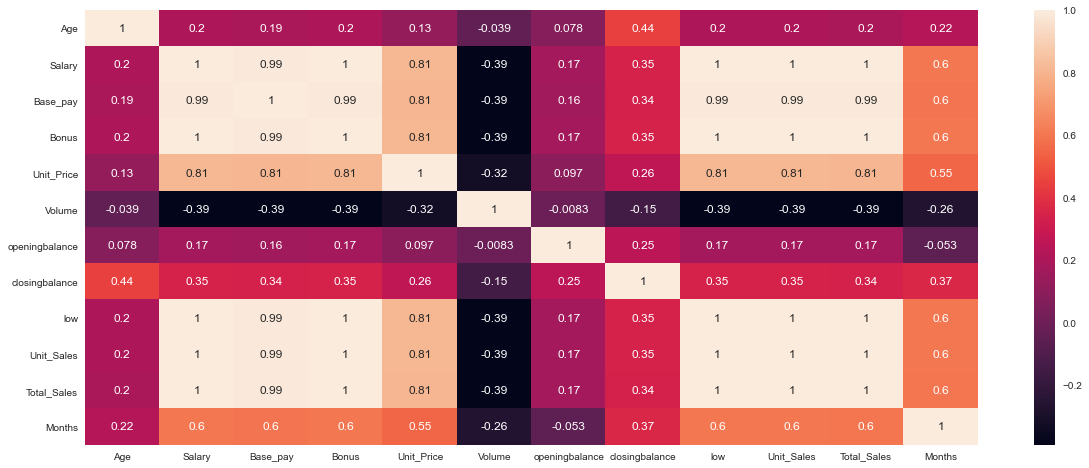

In [2902]:
plt.figure(figsize = (20,8))

sns.heatmap(df.corr(method='spearman'), annot =True)

With salary the highly correlated columns are 

Total_Sales,Unit_Sales,low,Unit_Price,Bonus,Base_pay

let us look into the scatter plot of these Highly correlated columns with Salary


High Correlation among other columns:

low with :Base_pay,Bonus,Unit_Price,Unit_Sales,Total_Sales

UnitPrice with :Base_pay,Bonus,Unit_Sales,Total_Sales

Base_pay with:Bonus,Unit_Price,low,Unit_Sales,Total_Sales

Bonus with:Base_pay,Unit_Price,low Unit_Sales,Total_Sales

from the above we can infer that there is an existance of multicollinearity between the columns

# Visualisation of the correlation in the form of ScatterPlot 

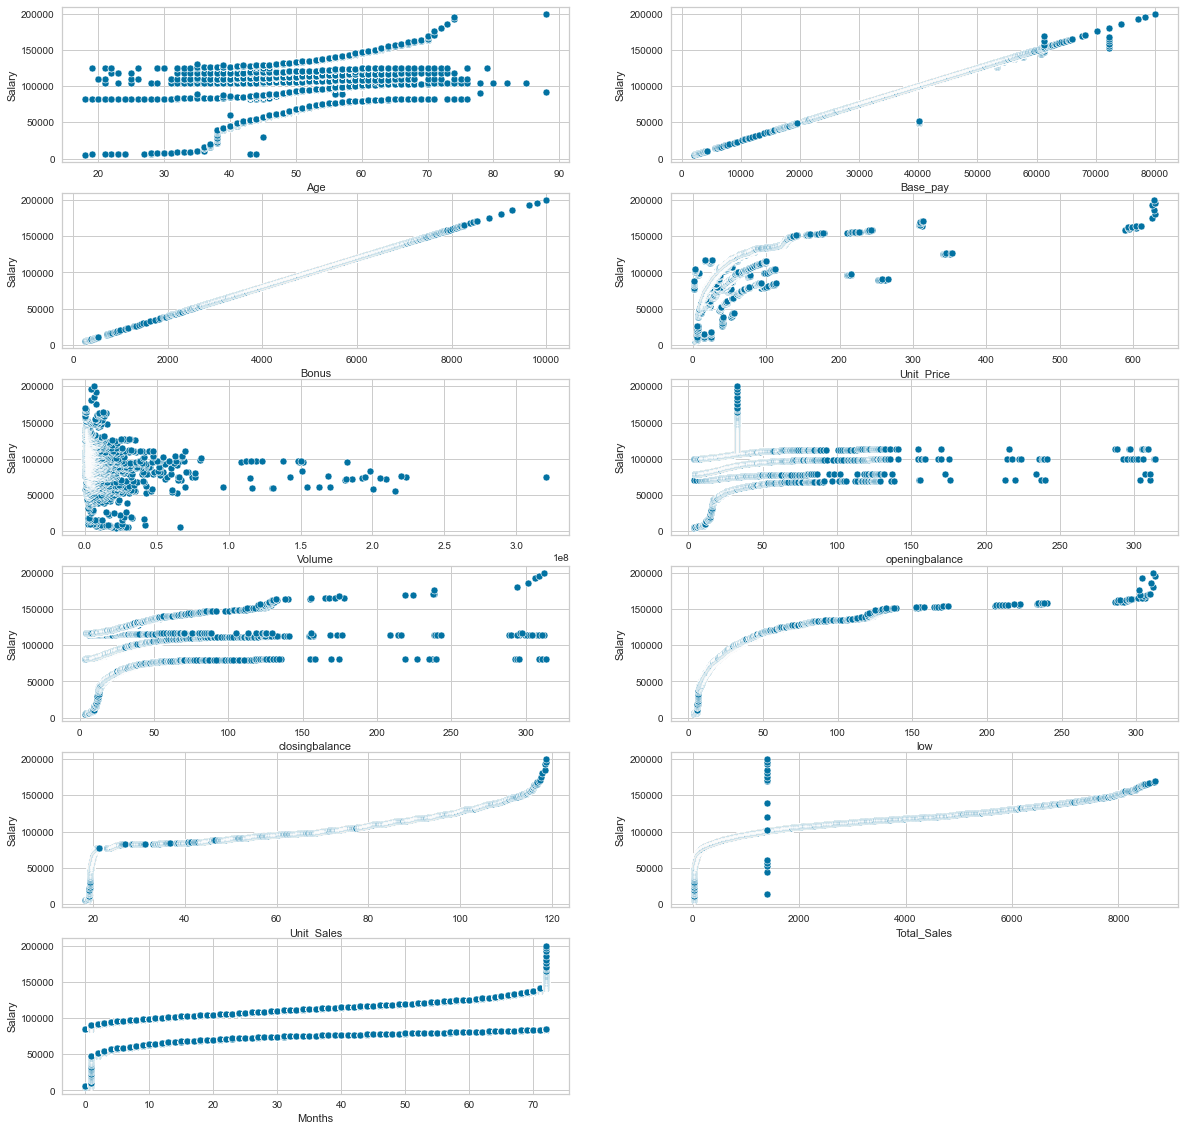

In [2903]:
plt.figure(figsize=(20,20))
#col=['Total_Sales','Unit_Sales','low','Unit_Price','Bonus','Base_pay']
k=1
for i in range(0,len(numerical_columns)):
    if numerical_columns[i]!='Salary':
        plt.subplot(6,2,k)
        sns.scatterplot(x=numerical_columns[i],y='Salary',data=df)
        k=k+1

We can see that there is a linear relationship between the highly correlated variables and the target variable Salary Column

Correlation is statistical term which refers to how close two variables/columns in having a linear relation ship with each other

<AxesSubplot:xlabel='Months', ylabel='Density'>

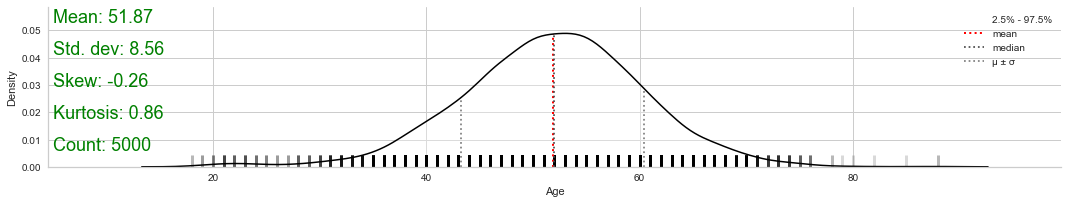

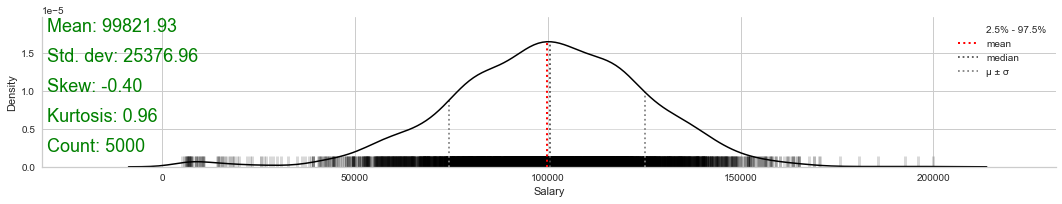

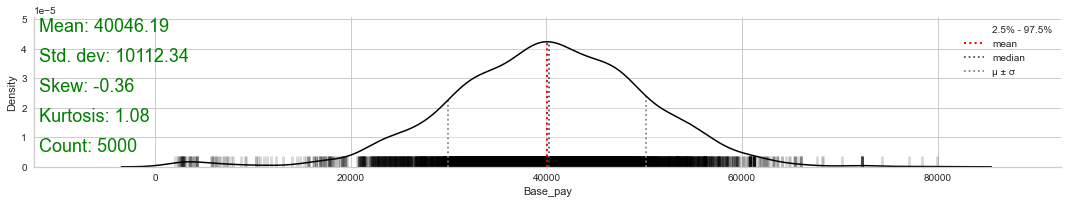

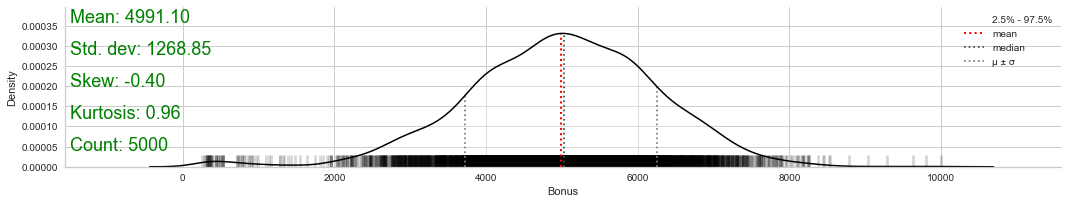

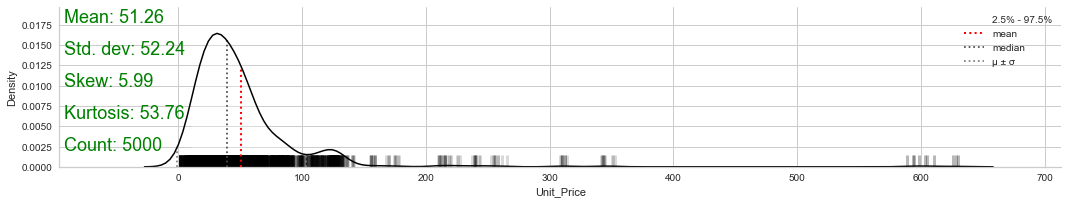

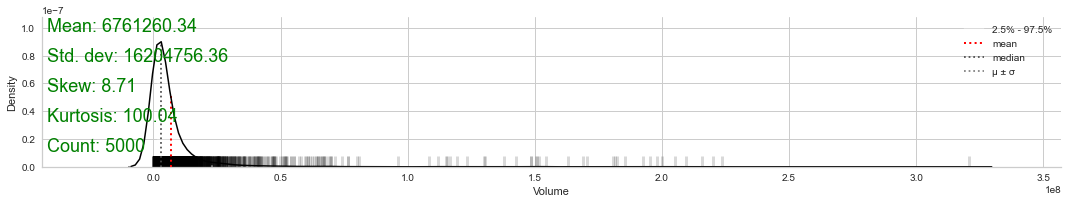

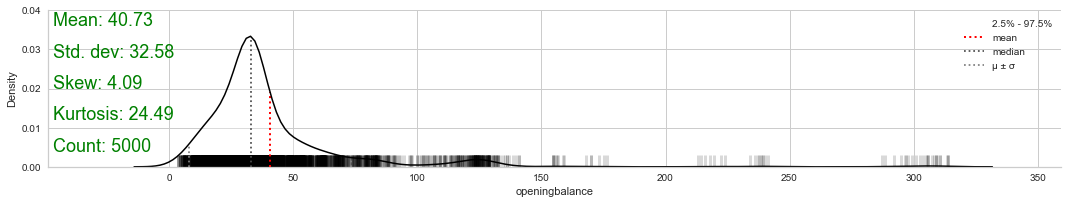

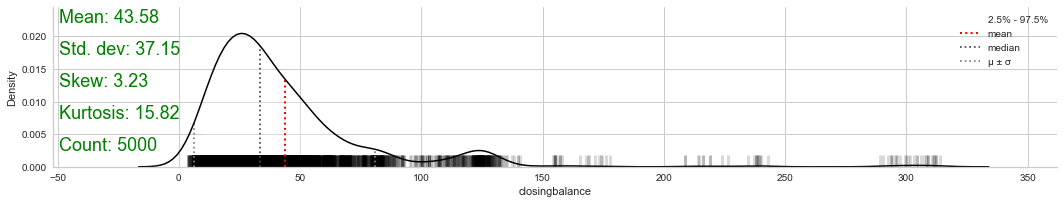

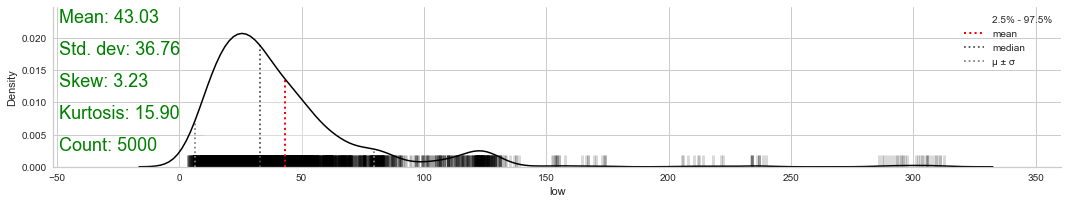

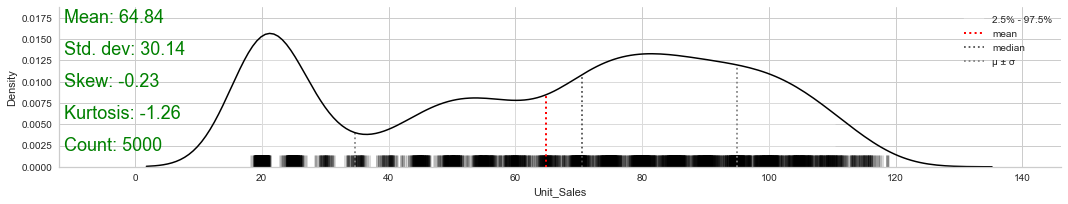

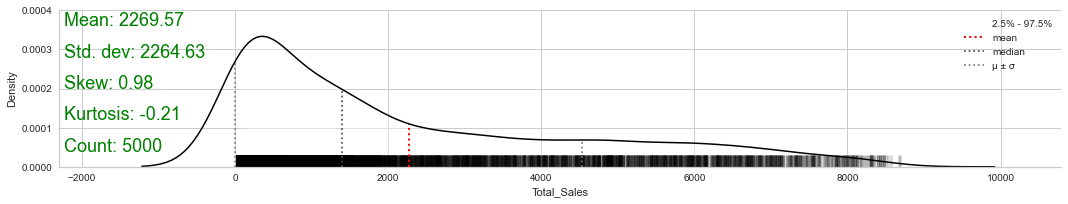

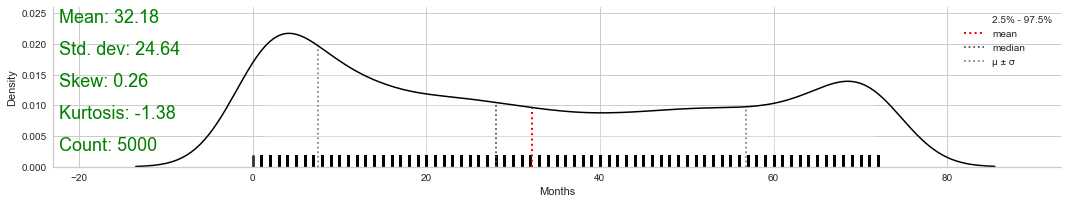

In [2904]:
import klib
#distplot function in klib returns a distribution plot for numerical features present in the dataset
klib.dist_plot(df,mean_color='Red',size=3,kde_kws={"color":"black","alpha":1,"linewidth":1.5},fill_kws={"color":'white',"alpha":0.3},font_kws={"color":'green',"weight":"normal","size":18})

#each plot gives the details of mean,median,standard deviation,skewness of the feature
#the shaded part in the graph shows the 95% distribution of data
#plots distribution for Numerical columns Age,Duration and Credit amount 
#their mean,median stddev,skewness can be known from the plot
#shows the probablity distribution of each numerical feature

Skewness:

is the measure of symmetry or the lack of symmetry

for the Age,Salary,Base_pay,Bonus, Months,Unit_Sales columns the skewness is very low ,we can consider that there is no skewness

for the other columns Unit_Price,Volume,openingbalance,closingbalance,low there is skewness,we can consider that these columns data are skewed

A general guideline for skewness is:

skewness value greater than 1 and lesser than -1 is an indication of a Skewed Distribution

Kurtosis:
    
-measures whether the data is heavy tailed or light tailed relative to a normal distribution

-i.e,the measure of amount of probability in the tails

-is the measure of the combined sizes of the two tails

High Kurtosis tends to heavy tails or Outliers

A genaral guide line for kurtosis is :

-greater than 1 the ditribution is too peaked

-lesser than -1 the distribution is too flat

High positive Kurtosis value can be observed in  Volume,low,openingbalance and closingbalance columns 

which we can observe that the columns data distribution is too peaked

UnitPrice,openingbalance,closingbalance,Volume,low are the columns with non-normal distributions

# Distribution plot and Box plot for the numerical columns 

Distribution plot is to get an idea of distribution

Boxplot is to visualise Outliers 

In [2905]:
outliers={}
for i in numerical_columns:
    
    #calculating interquantile range
    IQR=df[i].quantile(.75)-df[i].quantile(.25)
    
    #calculating upperbound
    upperbound=df[i].quantile(.75)+1.5*IQR
    
    #calculating lowerbound
    lowerbound=df[i].quantile(.25)-1.5*IQR
    
    #calculating the count of outliers in a particular column
    #and dividing the total no.of values present in the column
    o_count=(df[(df[i]>upperbound) | (df[i]<lowerbound)].shape[0])/df.shape[0]*100
    
    #outliers_percentage=round(outliers_count/total*100,2)
    outliers[i]=o_count
    
outlier_df=pd.DataFrame({'Columns':list(outliers.keys()),'Percentage':list(outliers.values())})

# Visualisation of Percentage of Outliers in each Numerical Column

Text(0.5, 1.0, 'Variables and their Outliers in percentage')

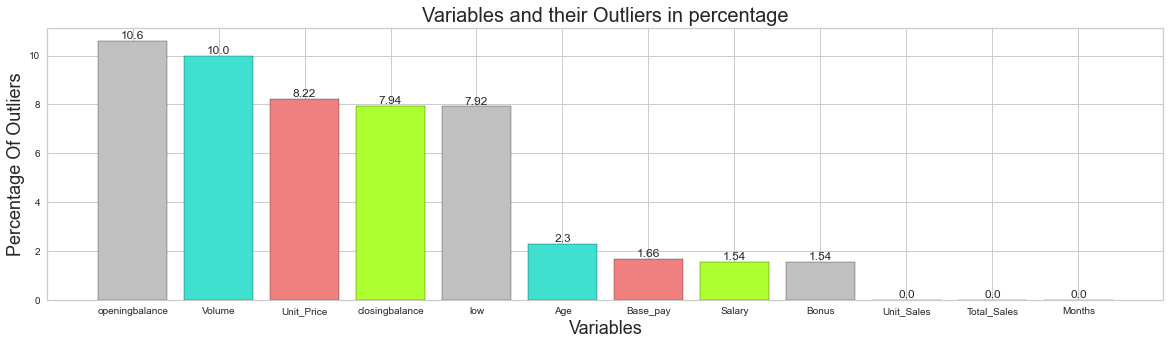

In [2906]:
plt.figure(figsize=(20,5))
p=outlier_df.sort_values(by='Percentage',ascending=False).reset_index()
y=p['Percentage']
x=p['Columns']
color=["silver",'turquoise',"lightcoral",'greenyellow']
plt.bar(x,y,color=color,ec="black")
for i in range(len(o['Columns'])):
        plt.text(i,y[i],y[i].round(2),ha="center",va="bottom",fontsize=12)
plt.xlabel("Variables",fontsize=18)
plt.ylabel("Percentage Of Outliers",fontsize=18)
plt.title(f"Variables and their Outliers in percentage",fontsize=20)



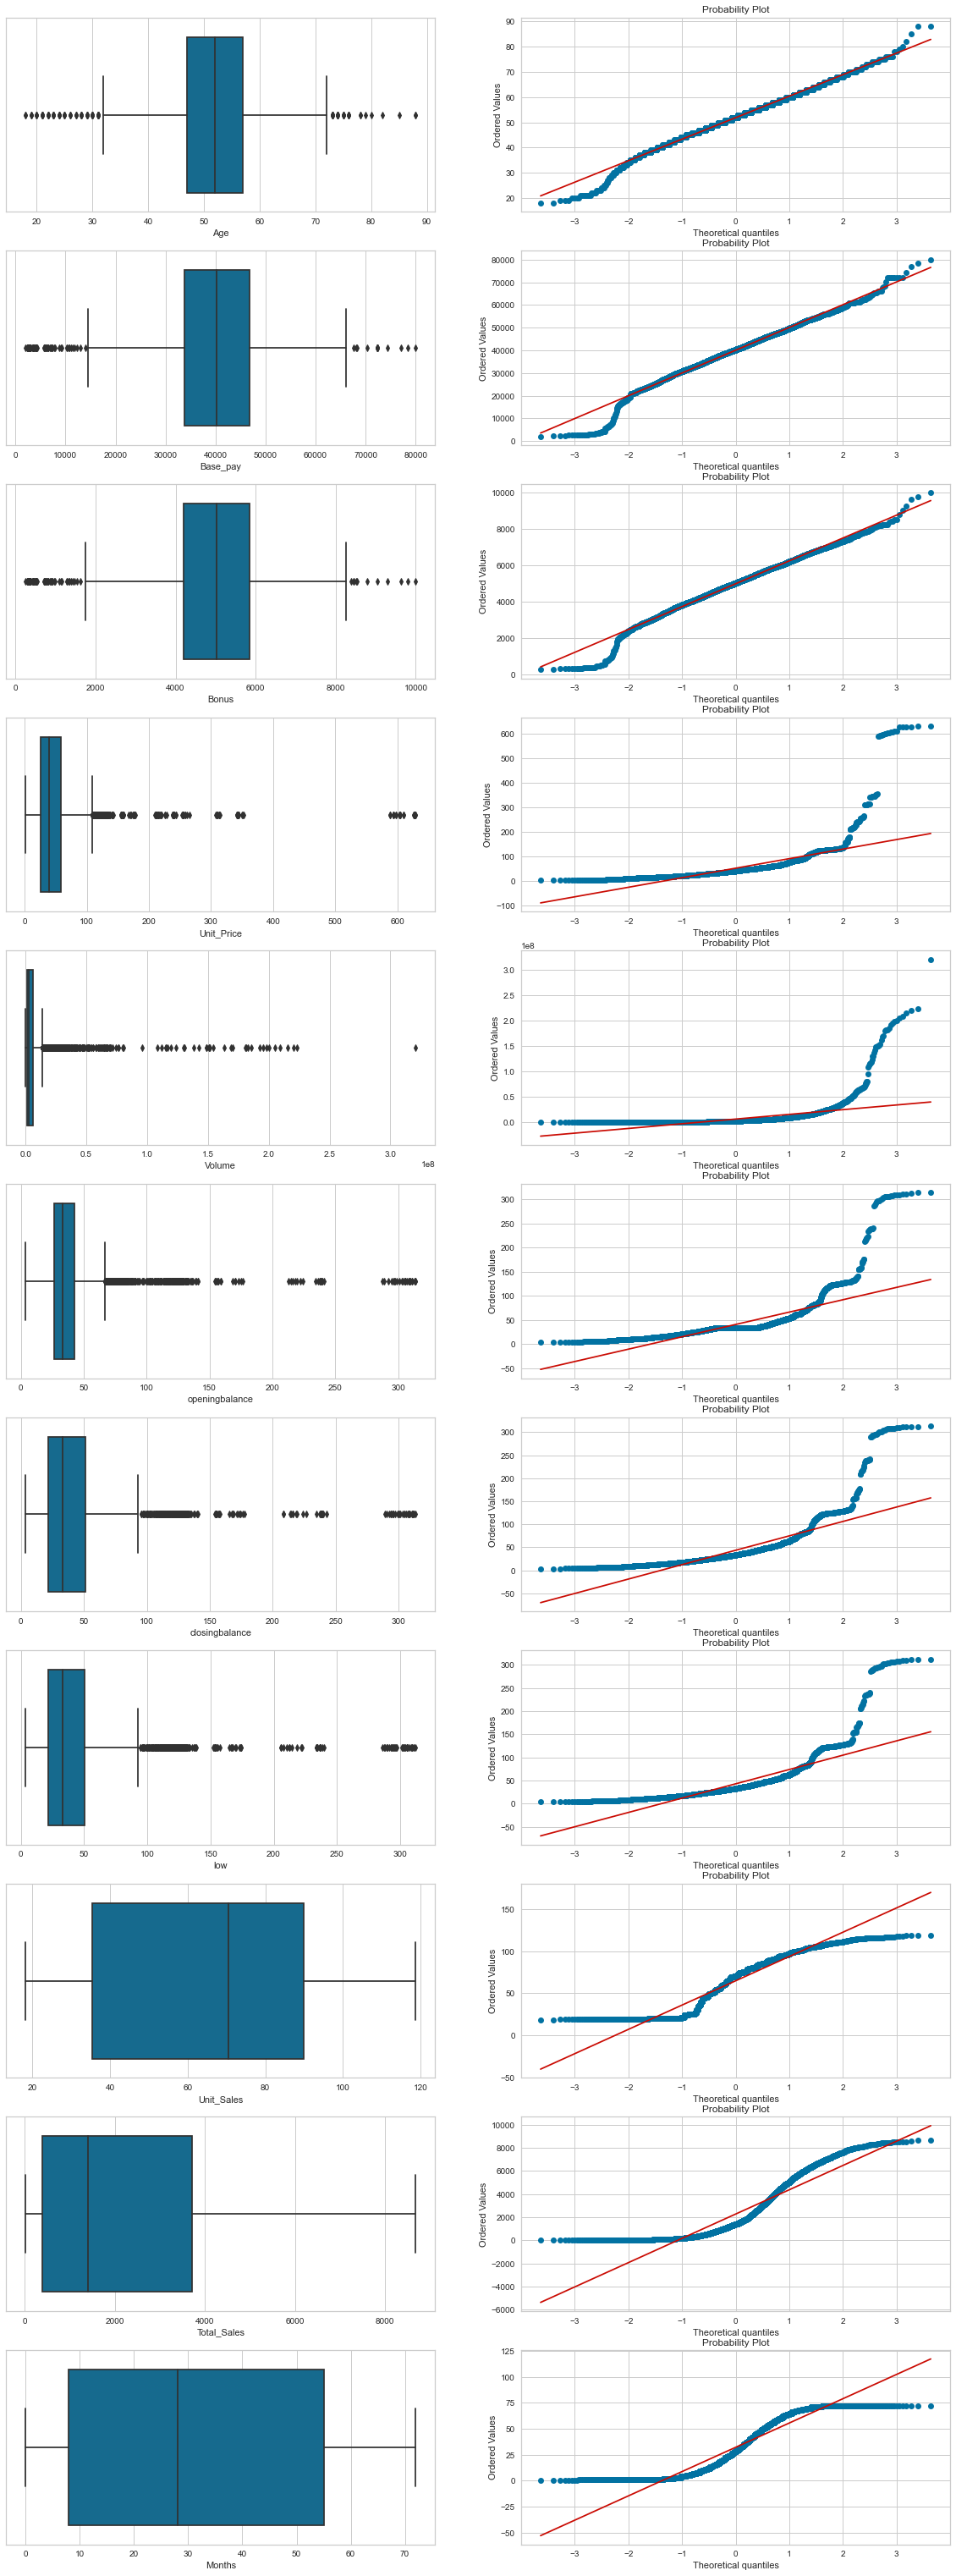

In [2907]:
#distribution plot and boxplot for the all Numerical Columns
i=0
from scipy import stats
plt.figure(figsize=(20,60))
sns.set_style(style='whitegrid')
i=1
for var in numerical_columns:
    if var!='Salary':
        #plt.subplot(12,3,i)
        #plot_ditribution(df,var)
        #i=i+1
        plt.subplot(12,2,i)
        sns.boxplot(x=var,data=df)
        i=i+1
        plt.subplot(12,2,i)
        res=stats.probplot(df[var],plot=plt)
        i=i+1
        
plt.show()

we have seen there are some outliers and some of the variables /columns are having non-normal distributions


one option that we had is applying the log transformations which means that for each value of the variable the logarithm is applied  so that it transforms to a normal distribution

also log transformation to some extent reduces the effect of outliers but cannot remove it completely

let us check for some of the columns

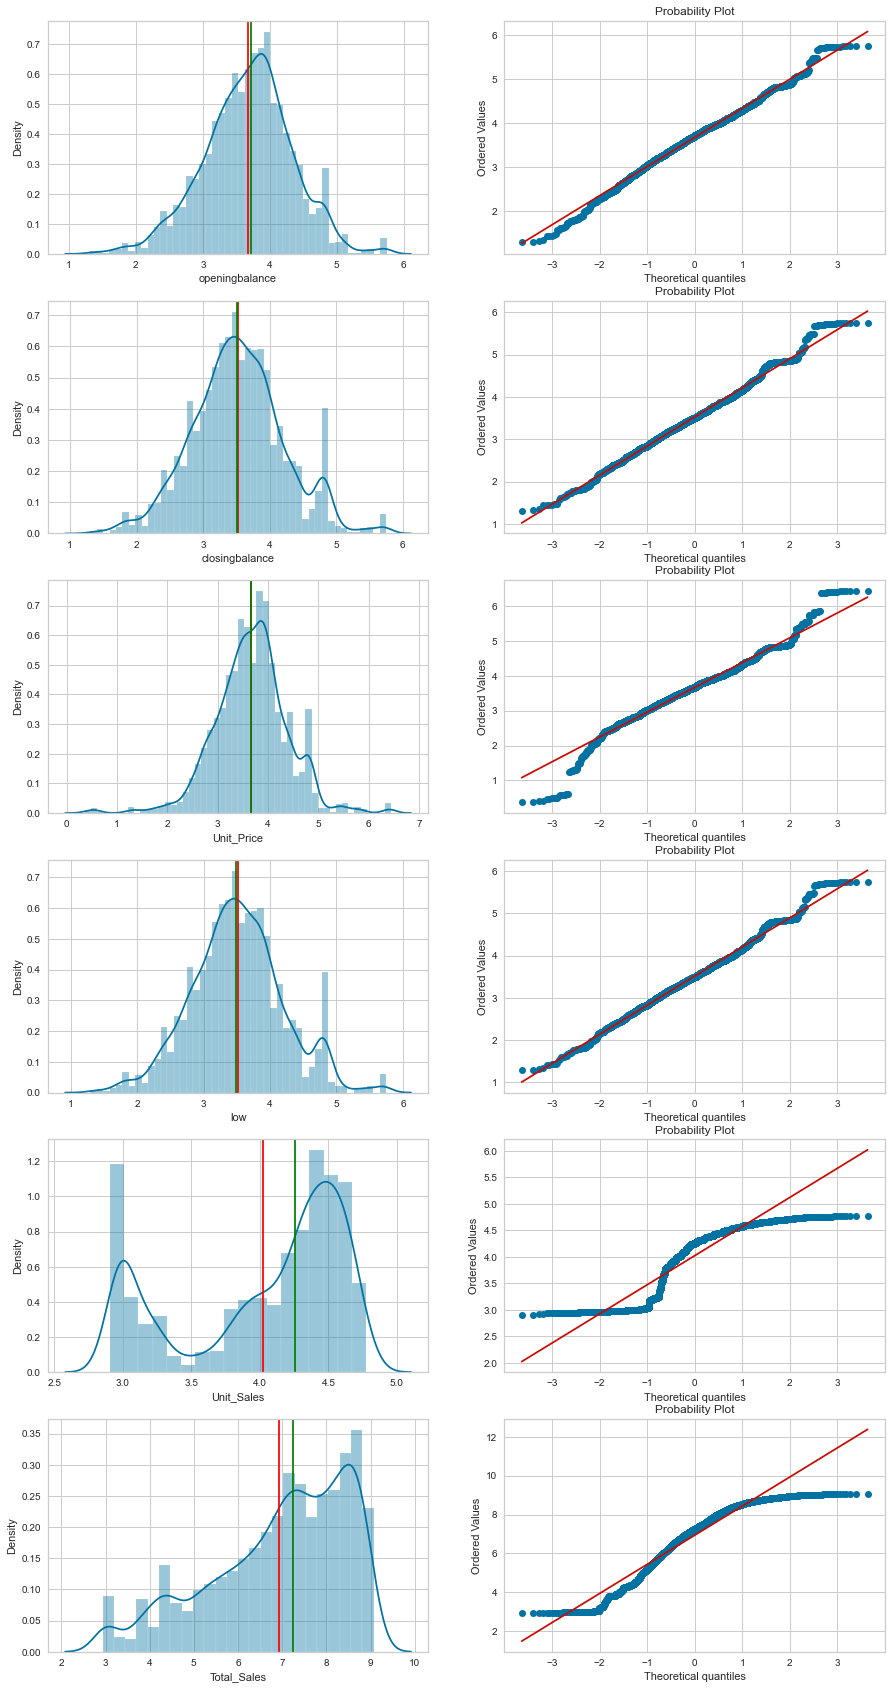

In [2908]:
plt.figure(figsize=(15,30))

col1=['openingbalance','closingbalance','Unit_Price','low','Unit_Sales','Total_Sales']
k=0
for i in range(0,len(col1)):
    k=k+1
    plt.subplot(6,2,k)
    log_ob=np.log(df1[col1[i]])
    sns.distplot(log_ob)
    plt.axvline(x=log_ob.mean(),color='red')
    plt.axvline(x=log_ob.median(),color='green')
    k=k+1
    plt.subplot(6,2,k)
    res=stats.probplot(log_ob,plot=plt)
    

plt.show()

we can see an improvement in the openingbalance,closingbalance,Unit_Price,Low columns but not in Unit_Sales and Total_Sales

also didnot work for the Volume Column as well

## Calculating Skewness of each Numerical column

In [2909]:
skewness=[]

#for every numerical column lets calculate the skewness
for i in df1.select_dtypes(np.number).columns:
    skewness.append(df1[i].skew())

#creating a dataframe
skew_f=pd.DataFrame()

#assigning column names 
skew_f['Columns']=df1.select_dtypes(np.number).columns

#assigning respective skewness of the columns 
skew_f['skewness']=skewness

skew_f['skewed']=0

for i in range(0,len(skew_f['Columns'])):
    #if skew value is greater than 1 then it is skewed
        if abs(skew_f['skewness'][i])>1:
            skew_f['skewed'][i]='True'
        else:
            skew_f['skewed'][i]='False'
skew_f   

,Columns,skewness,skewed
0,Age,-0.259971,False
1,Salary,-0.396042,False
2,Base_pay,-0.354277,False
3,Bonus,-0.396042,False
4,Unit_Price,5.989663,True
5,Volume,8.709735,True
6,openingbalance,2.833513,True
7,closingbalance,3.226368,True
8,low,3.233667,True
9,Unit_Sales,-0.225447,False


Applying logarithmic Transformation for the skewed columns and where the logarithmic transformation is showing a valid improvement

In [2910]:
col=['openingbalance','closingbalance','Unit_Price','low']
for i in range(0,len(col)):
    df1['log_'+col[i]]=np.log(df1[col[i]])

# Target Variable Analysis
target variable in the given dataset is Salary Column

<AxesSubplot:xlabel='Salary'>

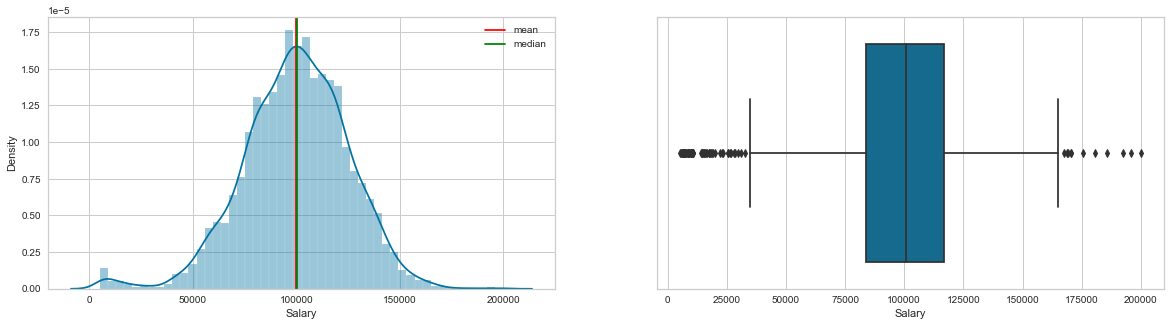

In [2942]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plot_ditribution(df,'Salary')
plt.subplot(1,2,2)
sns.boxplot(x='Salary',data=df)

the above visualisation shows that the Target Variable 'Salary' Column is normally distributed and there are some outliers in the salary column

## Applying Normality Test Over the Numerical Columns
We have seen some visulaisations to check for the normality but it is important to confirm with statistical tests

In [2912]:
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import normaltest
#applying the kolmogorov-smirnov Test for Normality
ks=[]
y=[]
for i in df.select_dtypes(np.number).columns:
    if kstest(df1[i],'norm').pvalue<0.05:
        ks.append(i)
        y.append(np.round(kstest(df1[i],'norm').pvalue,4))
#applying the shapiro-wilk Test for Normality
shap=[]
z=[]
for i in df.select_dtypes(np.number).columns:
    if shapiro(df1[i]).pvalue<0.05:
        shap.append(i)
        z.append(np.round(shapiro(df1[i]).pvalue,4))
test=pd.DataFrame()
test['shapiro_nonnormal']=shap
test['shapiro_p_value']=z
test['ks_test_nonnormal']=ks
test['ks_p_value']=y
test

,shapiro_nonnormal,shapiro_p_value,ks_test_nonnormal,ks_p_value
0,Age,0.0,Age,0.0
1,Salary,0.0,Salary,0.0
2,Base_pay,0.0,Base_pay,0.0
3,Bonus,0.0,Bonus,0.0
4,Unit_Price,0.0,Unit_Price,0.0
5,Volume,0.0,Volume,0.0
6,openingbalance,0.0,openingbalance,0.0
7,closingbalance,0.0,closingbalance,0.0
8,low,0.0,low,0.0
9,Unit_Sales,0.0,Unit_Sales,0.0


Previously in the visualisations of normalilty of the numerical columns some of the columns appeared to follow the normal distribution

but in the Statistical point of view


Mostly in all the normality tests :

    As we have seen above the p-value is lessthan 0.05 which means the null_hypothesis is rejected
    
    which means the normality is not followed  by these columns distribution
    
 Here alpha the significance value need to be set with the help of domain experts 
 
 but by default is set to 0.05 it can vary depending on the dataset given with the recommendation of the domain experts

# Understanding the Categorical Columns and Their Impact on the Salary Column¶

In [2913]:
print("Categorical variables are:")
categorical_columns=[]
for i in range(0,len(df.dtypes)):#iterating over all the data types of each column
    if df.dtypes[i]=='object':#checking for the numerical datatype
             categorical_columns.append(df.dtypes.index[i])
             print(df.dtypes.index[i])

Categorical variables are:
Gender
Business
Dependancies
Calls
Type
Billing
Rating
Education


GridSpec(6, 7)

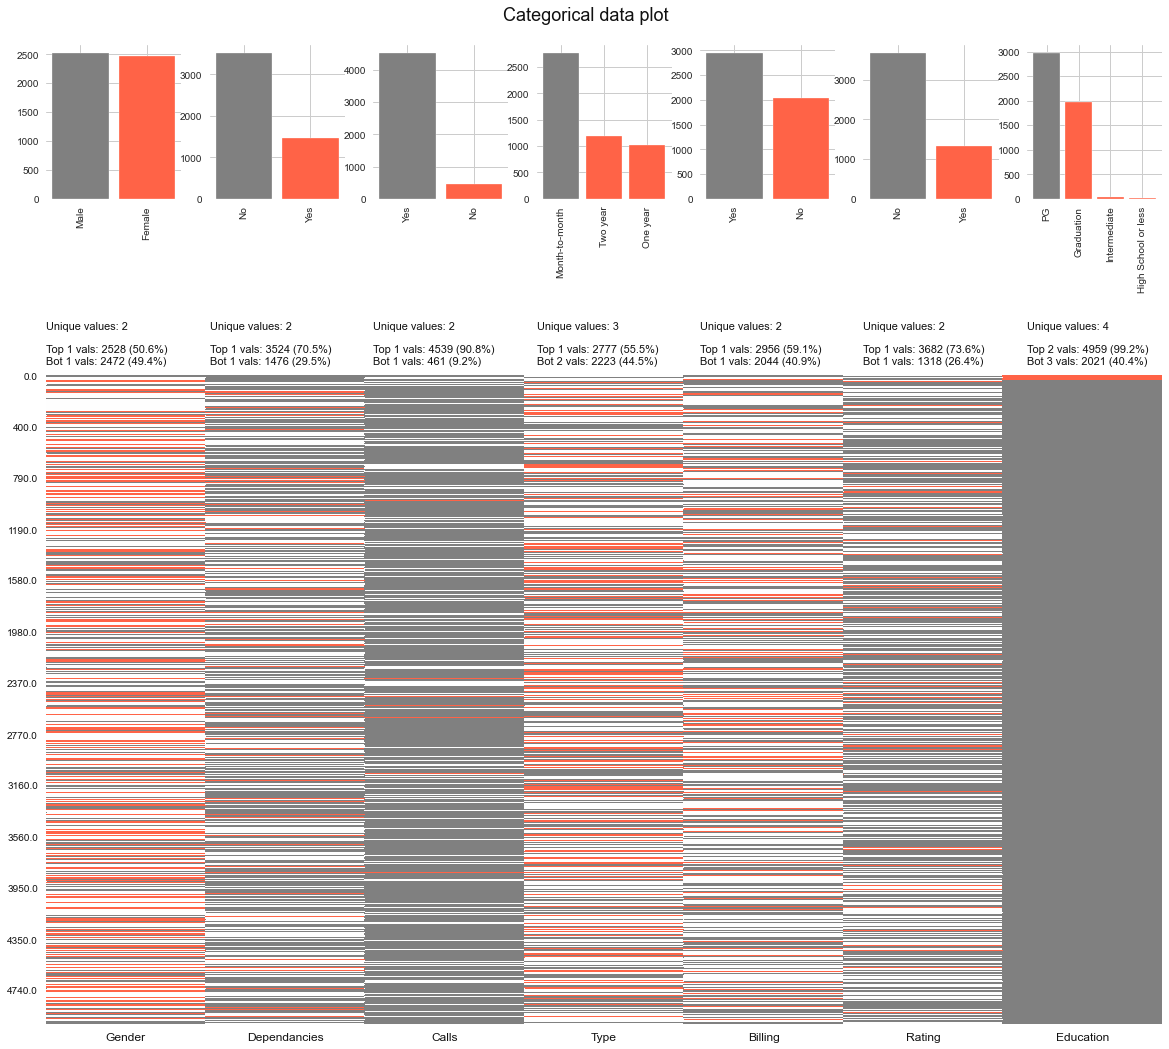

In [2914]:
import klib
#this catplot function in the klib helps to know 
#the values in the categorical features present in the dataset
#along with which unique values occupy top and bottom values in terms of their count
klib.cat_plot(df[['Gender','Dependancies','Calls','Type','Billing','Rating','Education']],figsize=(20,18),bar_color_top='grey',bar_color_bottom='tomato')

#returns a visualization of the unique_values and their frequency of categorical features

## Function to Visualise the distribution of the unique values in each Categorical column by using Pie chart

In [2915]:
def plot_cat(col,t):
    
    #getting the count of each Unique_value in each categorical column
    #ordering them in descending manner
    p1=df[col].value_counts().sort_values(ascending=t)
    print(p1)
    
    #color to the pie chart sections
    color=["silver",'turquoise',"lightcoral",'greenyellow']
    
    #to plot the pie chart
    plt.pie(p1.values,colors=color,autopct='%1.1f%%',startangle=90,textprops={'fontsize':12})

    #to display Title and Legend in pie chart
    plt.title(f'%Distribution of unique values in the column{col}',fontsize=12)
    plt.legend(p1.index.to_list(),title=col,loc='best')



## Function to Visualise how the salary mean value is varying according to the unique values in each Categorical column

In [2916]:
def plot_bar(df,col,col1,t):
    
#grouping on the basis of the categorical column's Unique values and
#getting the mean salary value for those Unique avlues
    x=df.groupby(col)[col1].mean().sort_values(ascending=t)
    
#to plot the bargraph
    color=["silver",'turquoise',"lightcoral",'greenyellow']
    plt.bar(x.index,x.values.round(2),color=color,ec="black")

#labels and titles to bargraph
    plt.xlabel(f"{col}",fontsize=18)
    plt.ylabel(f"{col1}",fontsize=18)
    plt.title(f"{col1} vs {col}",fontsize=20)

#to give grid look to the plot
    #l=x.index.to_list()
    plt.grid(True)
    #plt.legend(l,title=col,loc='best')

#to plot text on each bar in the plot
    for i in range(len(x)):
        plt.text(i,x.values[i],x.values[i].round(2),ha="center",va="bottom",fontsize=12)

# Gender Column
Female

Male are Unique_Values

Female    2472
Male      2528
Name: Gender, dtype: int64


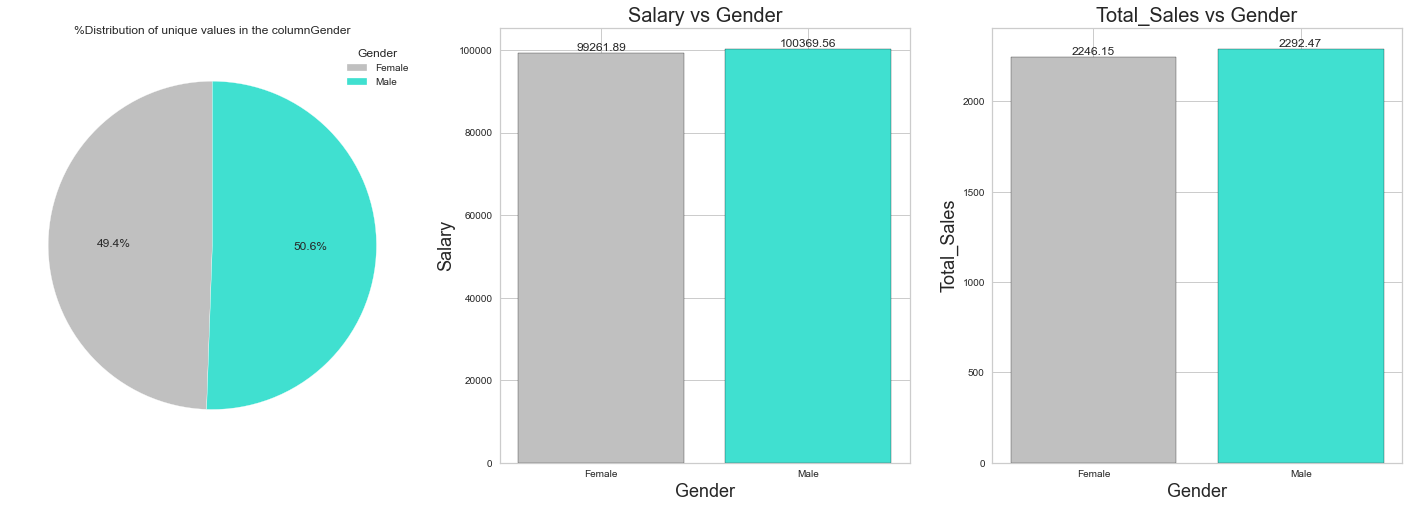

In [2917]:
plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
plot_cat('Gender',True)
plt.subplot(1,3,2)
plot_bar(df,'Gender','Salary',True)
plt.subplot(1,3,3)
plot_bar(df,'Gender','Total_Sales',True)
plt.show()
        

# Dependancies Column

Yes    1476
No     3524
Name: Dependancies, dtype: int64


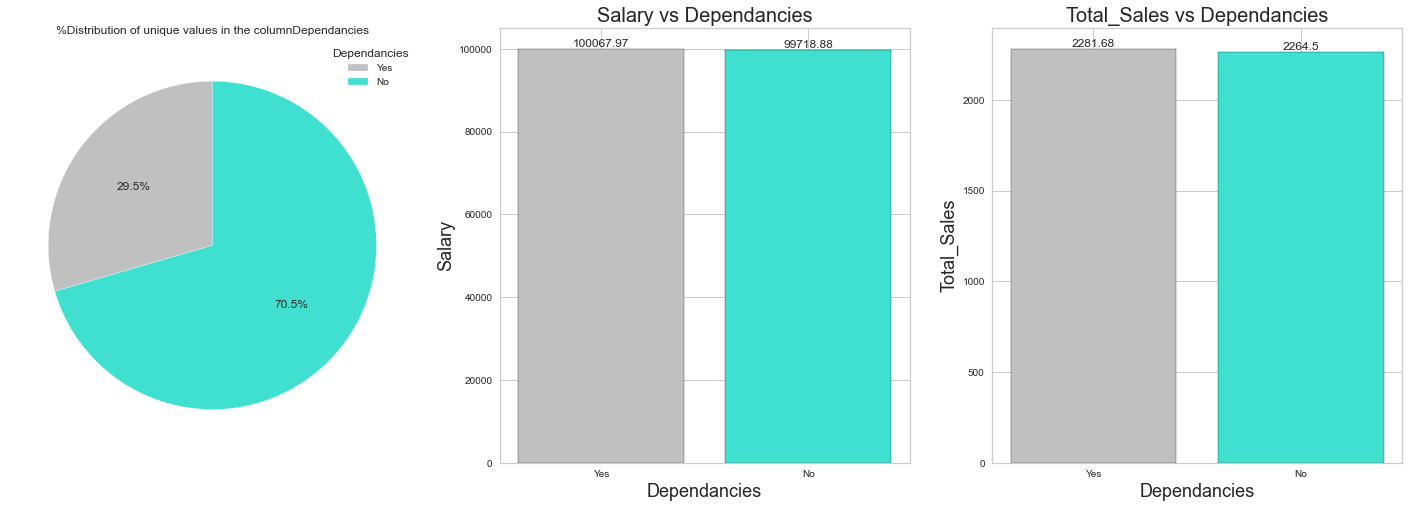

In [2918]:
plt.figure(figsize=(25,8))
#to plot the piechart using the plot_cat function
plt.subplot(1,3,1)
plot_cat('Dependancies',True)

#to plot the bar chart using  the plot_bar function
plt.subplot(1,3,2)
plot_bar(df,'Dependancies','Salary',False)

plt.subplot(1,3,3)
plot_bar(df,'Dependancies','Total_Sales',False)



plt.show()
        

# Billing Column

No     2044
Yes    2956
Name: Billing, dtype: int64


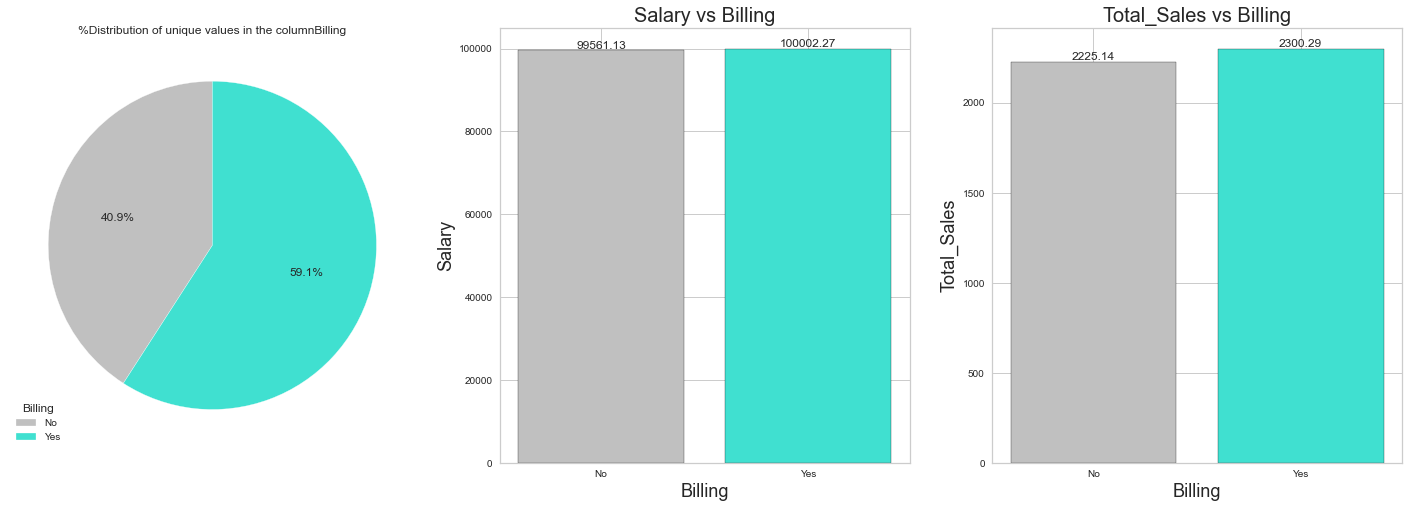

In [2919]:
plt.figure(figsize=(25,8))

#to plot the piechart using the plot_cat function
plt.subplot(1,3,1)
plot_cat('Billing',True)

#to plot the bar chart using  the plot_bar function
plt.subplot(1,3,2)
plot_bar(df,'Billing','Salary',True)

plt.subplot(1,3,3)
plot_bar(df,'Billing','Total_Sales',True)

plt.show()

# Calls Column

No      461
Yes    4539
Name: Calls, dtype: int64


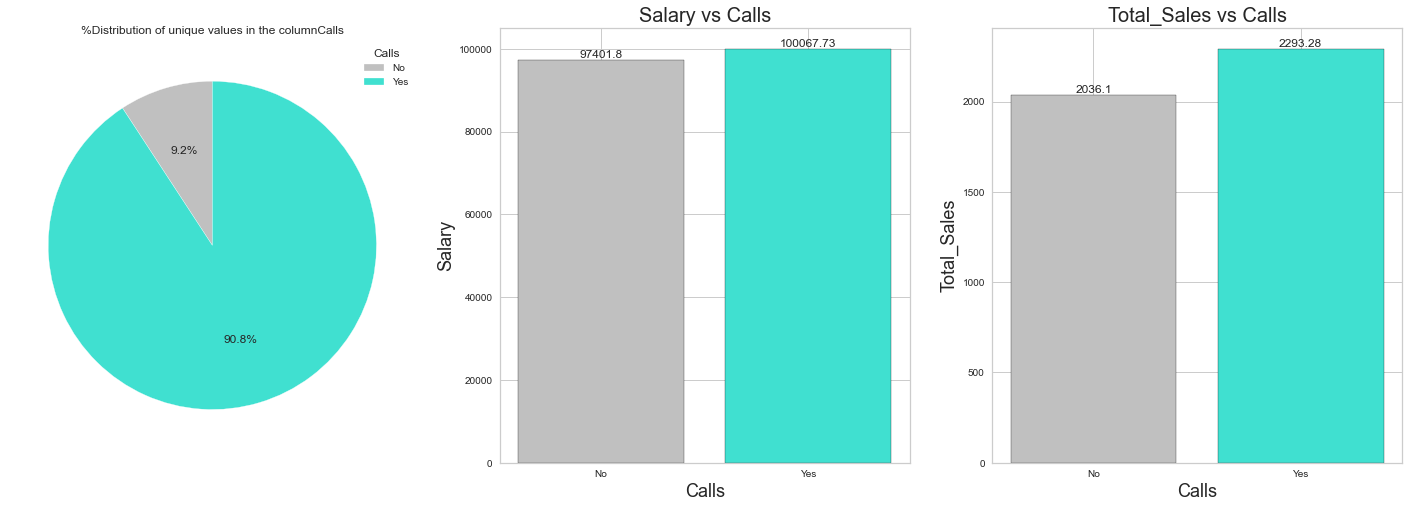

In [2920]:
plt.figure(figsize=(25,8))

#to plot the piechart using the plot_cat function
plt.subplot(1,3,1)
plot_cat('Calls',True)

#to plot the bar chart using  the plot_bar function
plt.subplot(1,3,2)
plot_bar(df,'Calls','Salary',True)

plt.subplot(1,3,3)
plot_bar(df,'Calls','Total_Sales',True)
plt.show()
        

# Type Column

One year          1028
Two year          1195
Month-to-month    2777
Name: Type, dtype: int64


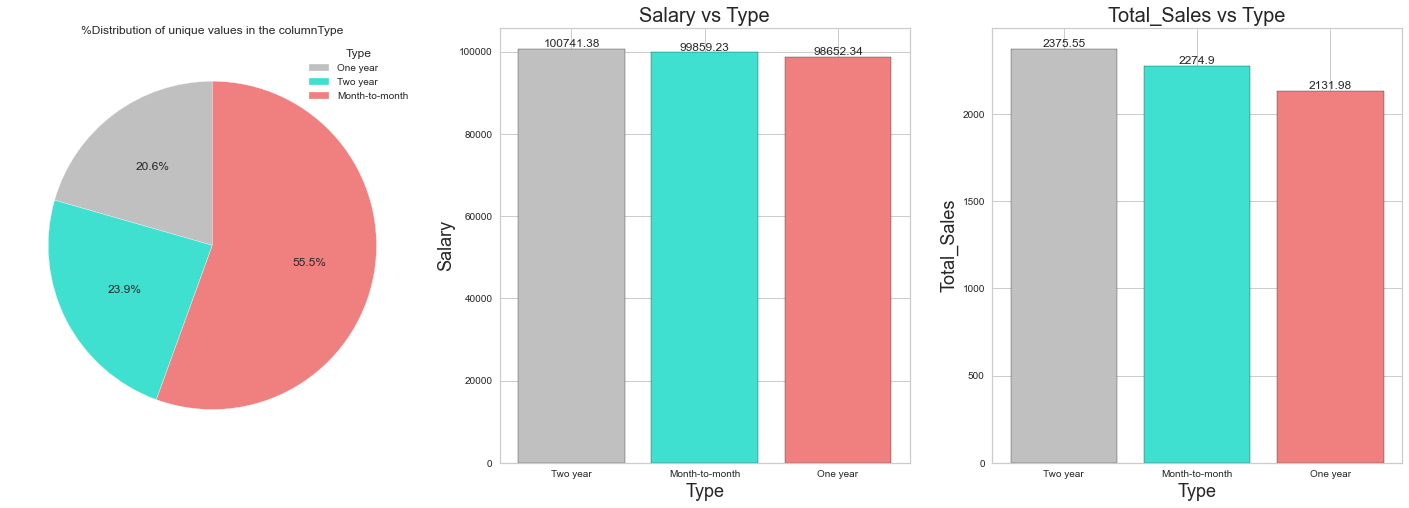

In [2921]:
plt.figure(figsize=(25,8))

#to plot the piechart using the plot_cat function
plt.subplot(1,3,1)
plot_cat('Type',True)

#to plot the bar chart using  the plot_bar function
plt.subplot(1,3,2)
plot_bar(df,'Type','Salary',False)

plt.subplot(1,3,3)
plot_bar(df,'Type','Total_Sales',False)
plt.show()

# Education Column

High School or less      14
Intermediate             27
Graduation             1980
PG                     2979
Name: Education, dtype: int64


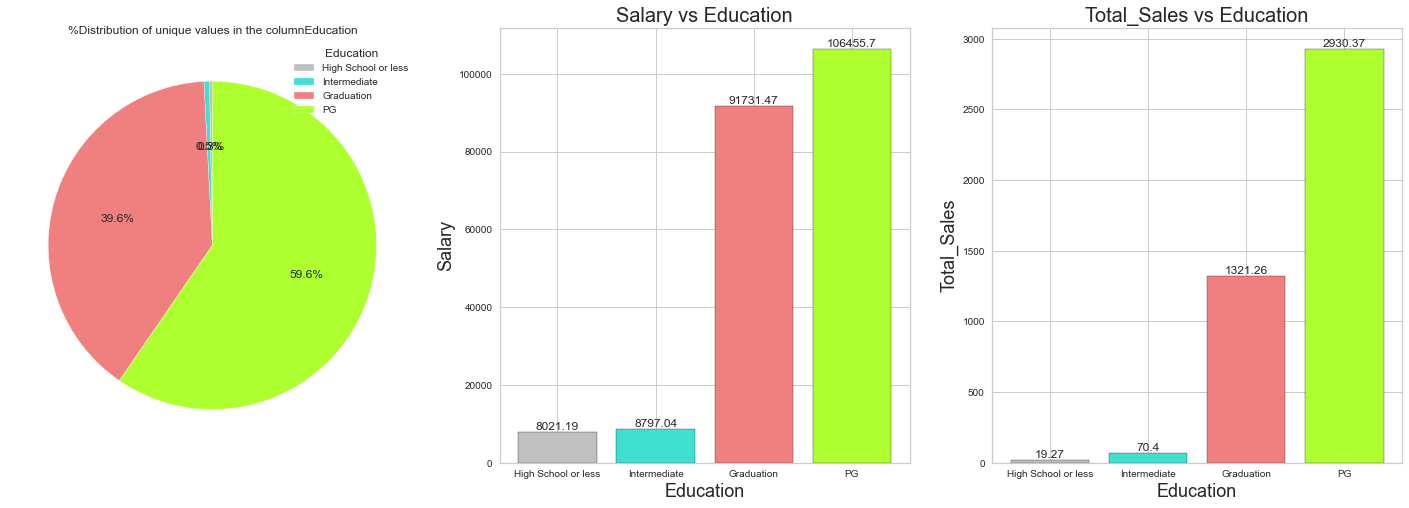

In [2922]:
plt.figure(figsize=(25,8))

#to plot the piechart using the plot_cat function
plt.subplot(1,3,1)
plot_cat('Education',True)

#to plot the bar chart using  the plot_bar function
plt.subplot(1,3,2)
plot_bar(df,'Education','Salary',True)

plt.subplot(1,3,3)
plot_bar(df,'Education','Total_Sales',True)

plt.show()

# Business Column

Yes     800
No     4200
Name: Business, dtype: int64


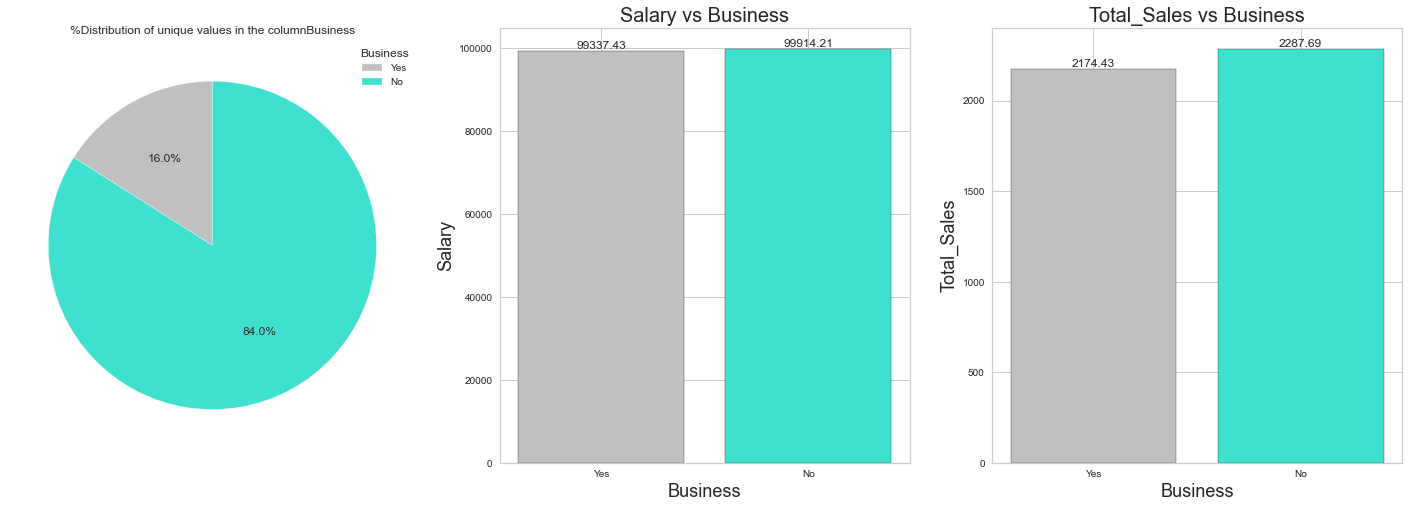

In [2923]:
plt.figure(figsize=(25,8))
#to plot the pie--chart using the plot_cat function
plt.subplot(1,3,1)
plot_cat('Business',True)

#to plot the bar--chart using  the plot_bar function
plt.subplot(1,3,2)
plot_bar(df,'Business','Salary',True)

plt.subplot(1,3,3)
plot_bar(df,'Business','Total_Sales',True)

plt.show()

 from all the visualisations above we can see  some change in the mean of salary for the unique values of the categorical columns

let us go for the statistical confirmations before coming to a conclusion related to the significance of these categorical columns with the 'Salary Column'

# T-Test/Anova on the Categorical Columns
to decide which categorical columns are significant in having an impact with the Target variable Salary

Anova(One-way analysis of Variance) is used when we have a categorical independent variable (with two or more categories)


In [2943]:
import pingouin as pg
x=[ ]
y=[ ]
#iterating over the categorical columns
for var in categorical_columns:
    #performing anova for each categorical column
    #saving the p-value on x
    x.append(pg.anova(data=df,dv='Salary',between=var,detailed=True)['p-unc'][0].round(5))
    #saving the f-value in y
    y.append(pg.anova(data=df,dv='Salary',between=var,detailed=True)['F'][0].round(5))
#creating a dataframe to save these p-values and f-values for each categorical column
#creating two seperate dataframes and concatinating to one dataframe
y1=pd.DataFrame(y,columns=['f-value'])
x1=pd.DataFrame(x,columns=['p-value'])
x1=pd.concat([x1,y1],axis=1)
x1.index=categorical_columns
print(x1)

              p-value    f-value
Gender        0.12282    2.38184
Business      0.55578    0.34710
Dependancies  0.65732    0.19682
Calls         0.03161    4.62192
Type          0.15272    1.87986
Billing       0.54571    0.36511
Rating        0.56617    0.32917
Education     0.00000  383.34522


The Significant Columns are Calls and Education columns since p-value <0.05

The F-value of the Education Column :

is larger than any other columns/variables

which means that there is a great variation in the mean values of each unique value in the Education Column

i.e, for each unique value in the education column there is a large considerable difference in the salaries being showed among these unique values

The same is visualised in the Education Column's barchart and the pie chart

The F-value of the Calls Column :

is next to the Education column in having variations in the mean values of each unique value (Calls Column)
 
which can be seen in the visualisations created above 



    
What is Null hypothesis and Alternate hypothesis

-->Null hypothesis :there is no difference

       i.e,all the unique-values in the column are having equal/similar Salaries

       there is no considerable/significant difference in Salary among these values in the column
    
-->Alternate hypothesis : there is a difference

       i.e,all the unique values are not giving equal/similar Salaries

       there is a considerable/significant difference in Salary among these values in the column

-->A general Consideration regarding p-value is:
    
       p-value  if:
          <0.05 reject null hypothesis
          
          >0.05 accept null hypothesis

-->since the p-values for 

       -the Gender,Business,Dependancies,Type,Billing,and Rating Columns is more than 0.05
          
          so we accept the Null Hypothesis which says that there is no significant difference 

          we can consider the values of these Variables do not have any significant effect on the Target Variable Salary

       -the Calls,Education Columns is less thaan 0.05
       
          so we reject the Null Hypothesis and accept the Alternate Hypothesis which says that there is a difference
            
          we can consider the values of these Variables are having a significant effect on the Target Variable Salary
          
-->Final Conclusion:
       
       we can consider Calls and Education Column from all the categorical columns in the given dataset which has their 
       
       significant effect in determing the values of the  target variable Salary


# LabelEncoding of categorical columns using map function

Nominal columns:'Gender','Dependancies','Calls','Billing','Rating'

also Type column is nominal but there are three unique values so giving numbers to those unique values assigns order to 
the Unique values ,

this will change the nature of the column when used in the ml models,so we use get dummies inorder to give values to those 

Ordinal columns:'Education',since there is an order to the unique values in the column

In [2925]:
df1['Gender']=df1['Gender'].map({'Female':0,'Male':1})
df1['Dependancies']=df1['Dependancies'].map({'Yes':0,'No':1})
df1['Calls']=df1['Calls'].map({'Yes':0,'No':1})
df1['Billing']=df1['Billing'].map({'Yes':0,'No':1})
df1['Rating']=df1['Rating'].map({'Yes':0,'No':1})
df1['Education']=df1['Education'].map({'High School or less':0,'Intermediate':1,'Graduation':2,'PG':3})
df1['Business']=df1['Business'].map({'No':0,'Yes':1})

#dummies=pd.get_dummies(df1.Type)
#df1=pd.concat([df,dummies],axis=1)
#df1.drop('Type',axis=1,inplace=True)

But Regarding Categorical Columns 

-the insignificant columns can be dropped and 

-retain calls and education column

In Numerical Columns 

-as we have applied log transformations to openingbalance ,closingbalance,Unit_Price,low

-we can drop the normal columns and retain these log transformed columns

## Dropping the unnecessary columns

In [2945]:
#saving to the other dataframe
df2=df1.drop(['Gender','Dependancies','Billing','Rating','Business','Type','openingbalance','closingbalance','Unit_Price','low'],axis=1)

## To Check for the Multicollinearity
OLS model to check for the variance inflation scores of each feature 

In [2927]:
df3=df2.drop('Salary',axis=1)
v=[0]*df3.shape[1]
for i in range(0,df3.shape[1]):
    y=df3[df3.columns[i]]
    x=df3.drop(df3.columns[i],axis=1)
    model=sm.OLS(y,x)
    results=model.fit()
    rsq=results.rsquared
    #p=results.P
    vif=round(1/(1-rsq),2)
    v[i]=vif
    #print(f'r square value and vif of {df.columns[i]} column is {rsq},{vif},')
vifs=pd.DataFrame()
vifs["Independent_features"]=df3.columns
vifs['Scores']=v
#vifs['p-values']=p
vifs.sort_values(by='Scores',ascending=False)

,Independent_features,Scores
3,Bonus,3774.81
2,Base_pay,3334.46
12,log_low,870.12
5,Unit_Sales,101.68
11,log_Unit_Price,79.29
1,Age,48.75
9,log_openingbalance,37.60
10,log_closingbalance,37.26
8,Education,30.59
6,Total_Sales,18.52


as we can see there is an existance of multi collinearity among the independant features

we can infer that ,we cannot apply the linear regression to these features

## Seperating Target/Dependent Feature and Independent Features

In [2928]:
#dependent Feature
y=df2['Salary']
#Independent Feature
x=df2.drop('Salary',axis=1)

## Train-Test Splitting 
splitting the independent features and dependent feature into train and test dataset

## Standardisation Of the Independent Features
By applying Standard Scaler

After splitting the dataset into train and test sets

this avoids the data leakage into the test set

In [2930]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)
scaler.fit(xtrain)
x_train=scaler.transform(xtrain)
x_test=scaler.transform(xtest)

## Importing the Models

In [2931]:
from sklearn.model_selection import KFold, cross_val_score
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge, HuberRegressor,Ridge,Lasso

here the models that we are using are 

Lasso Regression

Ridge Regression

Bayesian Ridge regression

Random Forest Regression 

DecisionTree Regression

KNeighbors Regression

GradientBoosting Regression

light Gradient Boosting Machine(lgbm)

Huber Regression

In [2932]:
models={'lasso':Lasso(),'ridge':Ridge(),'br':BayesianRidge(),'Random_Forest':RandomForestRegressor(),'Dtree':DecisionTreeRegressor(),'KNN':KNeighborsRegressor(n_neighbors=10),'GBR':GradientBoostingRegressor(),'lgbm':LGBMRegressor(),'HR':HuberRegressor()}

# Model Training,Prediction,Evaluating

In [2933]:
kfold_validation=KFold(10)
#initialising the performance metrics 
results={ }
#to store cross-validation score
cvscore=[ ]
#to store Mean-Squared-Error of each model
mse=[ ]
#to store Mean-Absolute-Error of each model
mae=[ ]
#to store the accuracy obtained after training the model and before testing the model
before_testing_accuracy=[]
#to store the accuracy obtained after testing the model
after_testing_accuracy=[]
#to storethe model names
inde=[ ]
result=[ ]
predictframe=pd.DataFrame()
predictframe['Actual']=ytest
for name,model in models.items():
        #training the model using train dataset
        result=(abs(cross_val_score(model,x,y,cv=kfold_validation)))
        results[name]=result
        cvscore.append(np.mean(results[name]))
        model.fit(x_train,ytrain)
        #predicting the dependent feature from the independent features test dataset
        y_pred=model.predict(x_test)
        #Accuracy before Testing
        before_testing_accuracy.append(model.score(x_train,ytrain))
        #Accuracy after Testing
        after_testing_accuracy.append(model.score(x_test,ytest))
        #Mean squared Error of the model
        mse.append(mean_squared_error(ytest,y_pred))
        #Mean absoliute error of the model
        mae.append(mean_absolute_error(ytest,y_pred))
        inde.append(name)
        #predicted results for each model are stored in the dataframe predict frame
        predictframe[name]=y_pred

## Performance-Metrics of each model
mean squared error:mean of squares of errors(i.e, the difference between the actual values and the predicted values )

mean absolute error:mean of magnitude of errors(i.e, the difference between the actual values and the predicted values)

Accuracy before testing

Accuracy After testing

along with these metrics

the scores of each model after applying the cross-validation

In [2934]:
#rframe contains the performance mertrics of each model  
#now adding the cross_validation score values into the dataframe
rframe=pd.DataFrame(cvscore,columns=['cross-validation score'])

#dataframe index has the names ofthe models
rframe.index=inde
#means squared error metric
rframe['Mean_squared_error']=mse
#mean absolute error
rframe['Mean_absolute_error']=mae
#Accuracy before testing
rframe['Before_Training_accuracy']=before_testing_accuracy
#Accuracy After testing
rframe['After_Testing_accuracy']=after_testing_accuracy
rframe


,cross-validation score,Mean_squared_error,Mean_absolute_error,Before_Training_accuracy,After_Testing_accuracy
lasso,0.999912,1.228984e+03,6.226946,0.999998,0.999998
ridge,1.000000,1.247189e+04,54.264922,0.999981,0.999981
br,1.000000,1.279690e-11,0.000003,1.000000,1.000000
Random_Forest,0.956285,4.919553e+05,65.524731,0.999923,0.999270
Dtree,2.027263,1.542396e+05,65.953577,1.000000,0.999771
KNN,29.404890,3.228115e+06,603.631176,0.997728,0.995211
GBR,0.355135,3.469139e+05,225.591943,0.999910,0.999485
lgbm,2.868093,1.286284e+06,157.798394,0.999741,0.998092
HR,0.977314,6.999663e+05,76.690673,0.998977,0.998961


as we see from the above results the mean_squared_error and mean_absolute _error 

are very less for the bayesian ridge and the ridge regression models 

their accuracies are also good when compared with other models

these models are best for the given dataset in predicting the salary  


In [2935]:
predictframe

,Actual,lasso,ridge,br,Random_Forest,Dtree,KNN,GBR,lgbm,HR
1501,87840.04783,87838.990218,87821.076588,87840.047835,87851.886490,87819.64973,88151.059595,88104.166907,87867.915425,87840.047919
2586,101696.94250,101696.603678,101686.162031,101696.942499,101685.990049,101666.46830,101702.347020,101680.426269,101681.366548,101696.942550
2653,102526.10000,102522.149774,102556.229453,102526.099999,102530.563497,102533.54100,102562.984810,102617.914331,102409.772641,102526.099982
1055,80952.27759,80950.650702,80959.586124,80952.277597,80909.955297,80887.93068,80723.808671,80891.460523,80946.297080,80952.277708
705,74646.47280,74644.357048,74575.115909,74646.472794,74648.900667,74663.38330,74534.281093,74682.604372,74727.914941,74646.472894
...,...,...,...,...,...,...,...,...,...,...
3563,114422.28670,114422.050506,114410.642478,114422.286699,114402.082457,114452.30370,114533.315450,114334.150435,114492.630978,114422.286697
1538,88553.30084,88552.302186,88543.395333,88553.300835,88561.681901,88599.29660,88280.903935,88104.166907,88530.985962,88553.300911
1837,92765.02503,92760.648733,92754.121674,92765.025036,92764.157718,92764.61322,92615.965384,92546.391658,92838.394883,92765.025026
2380,99118.89053,99118.559544,99189.006863,99118.890537,99120.706605,99122.27636,98607.331457,99067.577427,99125.727999,99118.890455


<AxesSubplot:>

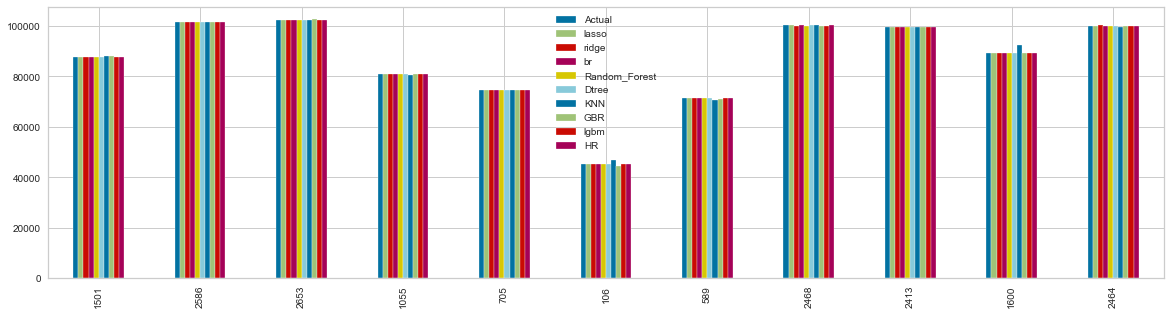

In [2936]:
predictframe.iloc[0:11].plot(kind='bar',figsize=(20,5))
#plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
#plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')


ScatterPlot for all the regression models predicted and actual values

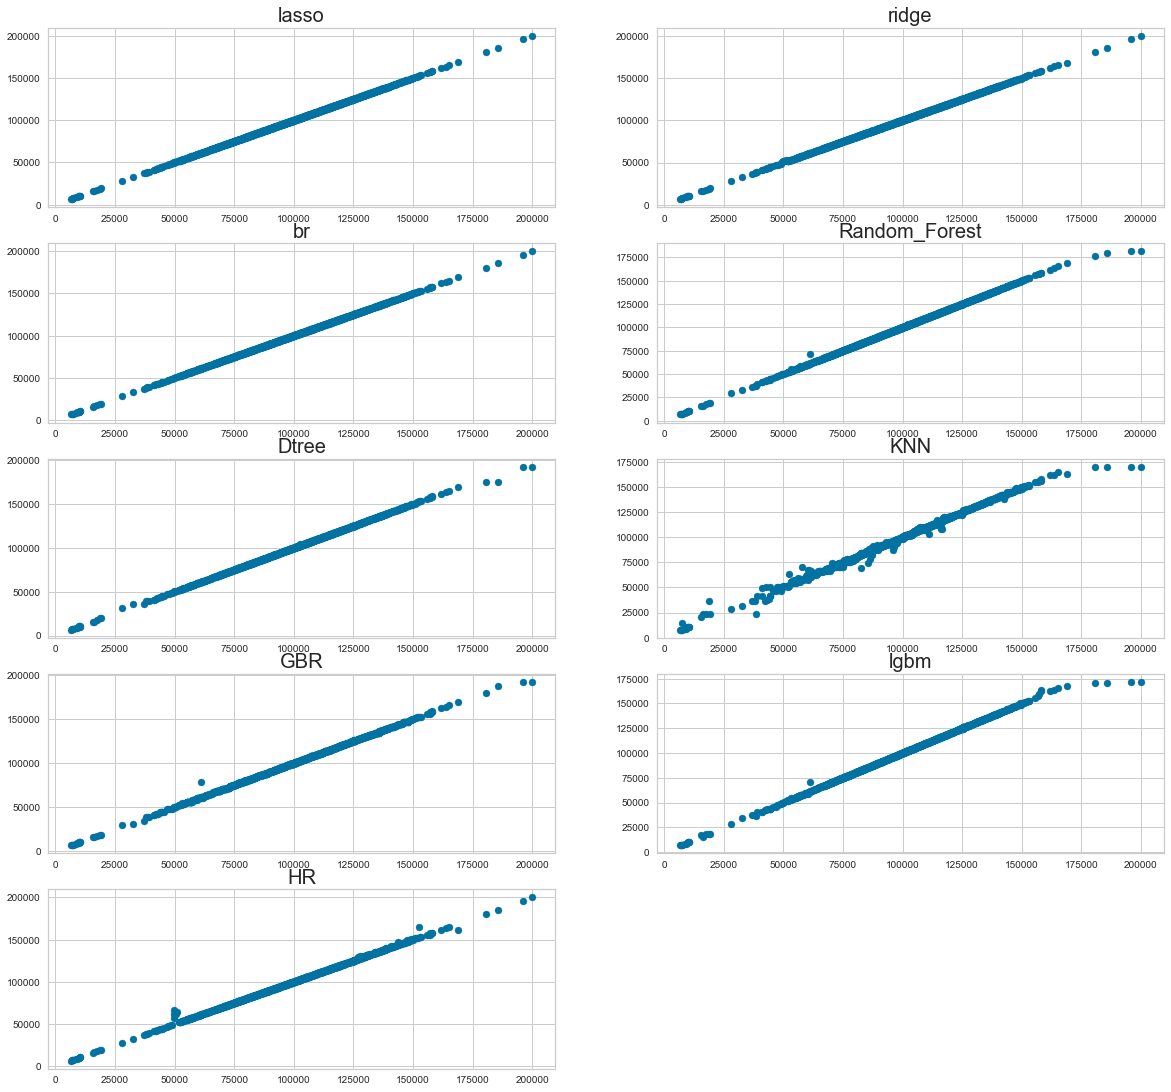

In [2949]:
plt.figure(figsize=(20,35))
k=0
for i in predictframe.columns:
    if i!='Actual':
            k=k+1
            plt.subplot(9,2,k)
            plt.scatter(predictframe['Actual'],predictframe[i])
            plt.title(f"{i}",fontsize=20)

## Distribution graph for the errors with each model between the predicted values and the actual values

<AxesSubplot:xlabel='HR', ylabel='Density'>

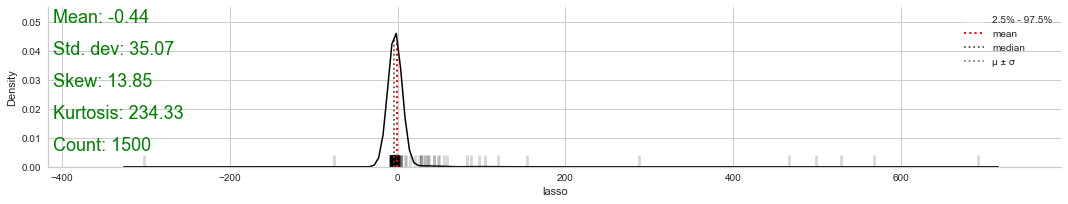

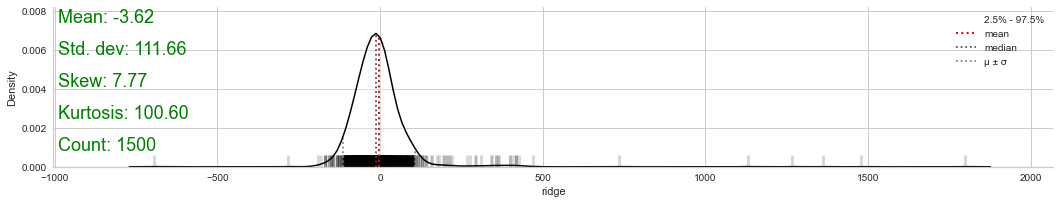

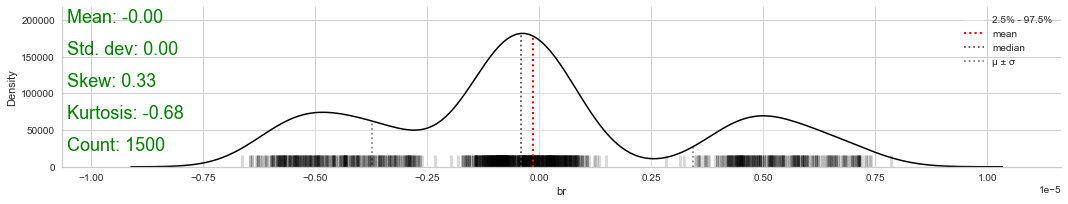

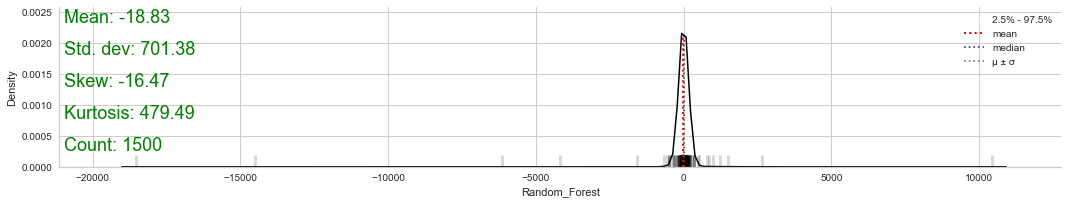

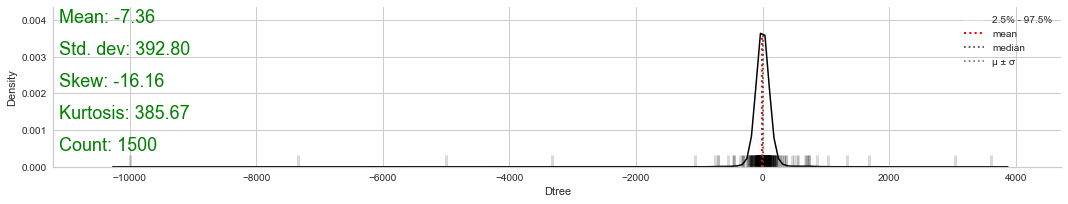

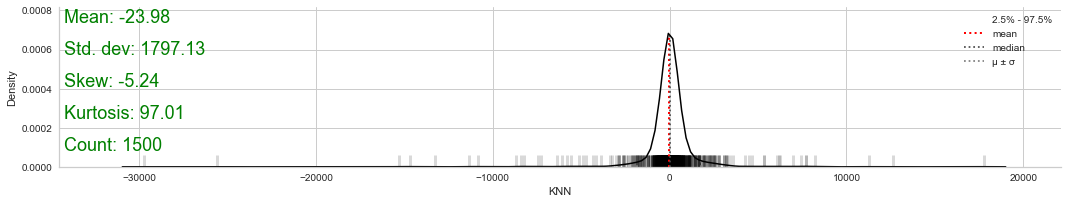

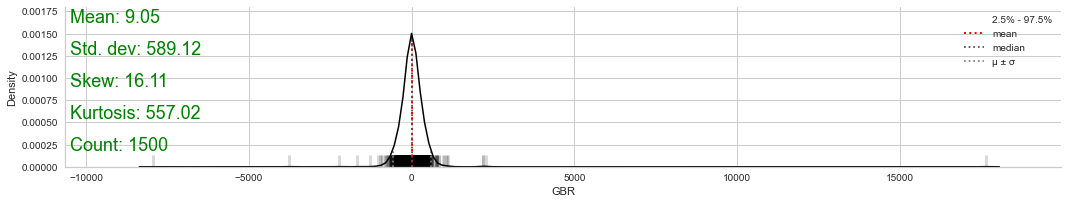

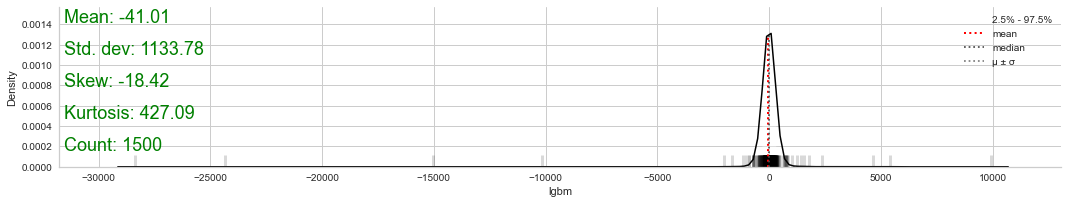

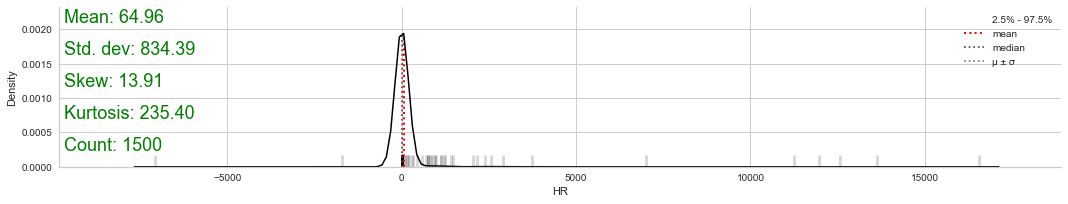

In [2938]:
import klib
#distplot function in klib returns a distribution plot for numerical features present in the dataset
error=pd.DataFrame()
error['lasso']=predictframe['lasso']-predictframe['Actual']
error['ridge']=predictframe['ridge']-predictframe['Actual']
error['br']=predictframe['br']-predictframe['Actual']
error['Random_Forest']=predictframe['Random_Forest']-predictframe['Actual']
error['Dtree']=predictframe['Dtree']-predictframe['Actual']
error['KNN']=predictframe['KNN']-predictframe['Actual']
error['GBR']=predictframe['GBR']-predictframe['Actual']
error['lgbm']=predictframe['lgbm']-predictframe['Actual']
error['HR']=predictframe['HR']-predictframe['Actual']
klib.dist_plot(error,mean_color='Red',size=3,kde_kws={"color":"black","alpha":1,"linewidth":1.5},fill_kws={"color":'white',"alpha":0.3},font_kws={"color":'green',"weight":"normal","size":18})


the above is graph of errors (predicted values-actual values)

as we can see here the bayesianridge has more normally distributed errors

when compared to the other models their skewness and kurtosis are very less in comparison to other models

also the bayesian ridge where the error were minimum and the accuracy is good

Bayesian Ridge Regression:

       this regression model allows a natural mechanism to survive insufficient data or poorly distributed data 
       
       by formulating linear regression using the probability distributions rather than point estimates
       
       the output for the dependent variable is assumed to drawn from a probability distribution 
       rather than estimated as a single value
       
       uses the bayesian principle
       for bayesian regression large dataset is needed to make it more accurate
       
       if the r2_score is 1 then it is a best model

In [2939]:
#let us see the coeficients for the bayesian ridge regression
br.coef_
columns=x.columns
bar=pd.DataFrame(columns,columns=['Features'])
bar['Coefficients']=br.coef_
bar

,Features,Coefficients
0,Calls,-2.315085e-08
1,Age,1.502044e-07
2,Base_pay,-1.405981e-06
3,Bonus,2.511423e+04
4,Volume,9.625421e-08
5,Unit_Sales,4.656496e-06
6,Total_Sales,6.072762e-07
7,Months,7.123299e-07
8,Education,-1.200259e-07
9,log_openingbalance,-3.727328e-07


Observations (Business Sense)

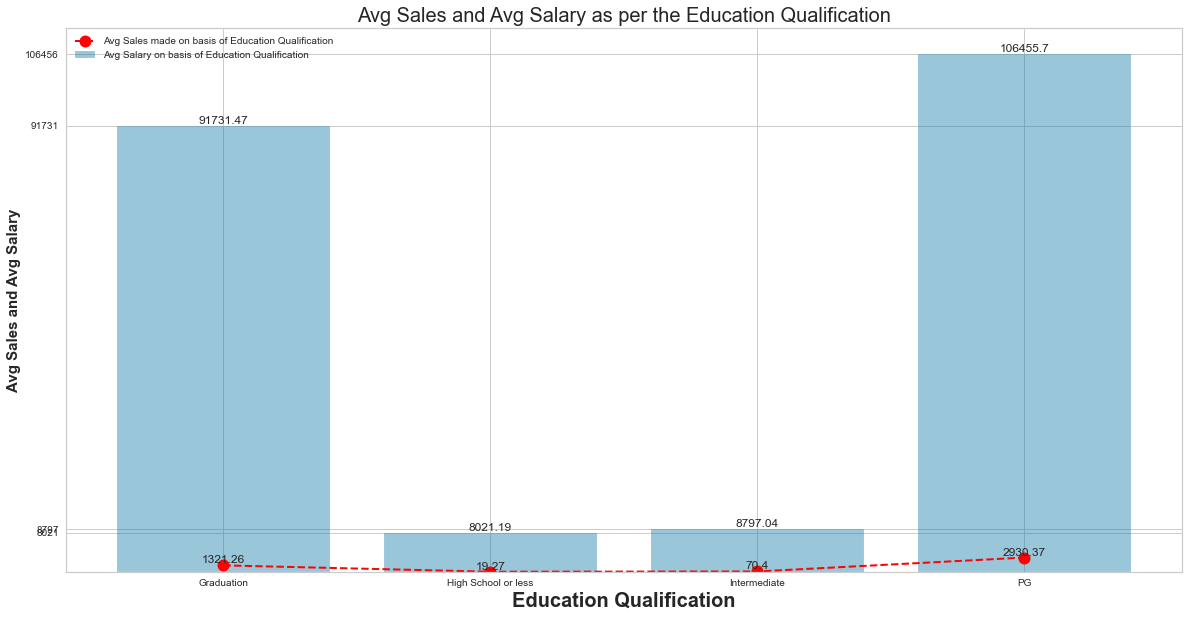

In [2950]:
#this plot is to see how  Education Qualification vs Salary and  Education Qualification vs Sales are 
f=df.groupby('Education')['Salary'].mean()
x=list(f.index)
y=list(f.values)
f1=df.groupby('Education')['Total_Sales'].mean()
z=list(f1.values)
plt.figure(figsize=(20,10))
for i in range(len(x)):
        plt.text(i,f.values[i],f.values[i].round(2),ha="center",va="bottom",fontsize=12)
plt.bar(x,y,label='Avg Salary on basis of Education Qualification',alpha=0.4)
for i in range(len(z)):
        plt.text(i,f1.values[i],f1.values[i].round(2),ha="center",va="bottom",fontsize=12)
plt.plot(x,z,label='Avg Sales made on basis of Education Qualification ',alpha=4,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.xlabel("Education Qualification",fontsize=20,fontweight="bold")
plt.ylabel("Avg Sales and Avg Salary",fontsize=15,fontweight="bold")
plt.title("Avg Sales and Avg Salary as per the Education Qualification",fontsize=20)
plt.xticks(x[::1])
plt.yticks(y[::1])
plt.legend()
plt.show()

As we see here the no.of sales being made on the basis of education criteria and

the avg salary being given on the basis of Education criteria i.e,

for education High School or less :19.27 sales ,salary given is 8021.19

for education Intermediate :102.87 sales,salary given is 8797.04

for education Graduation :1322.59 sales,salary given is 91731.47

for education Post-Graduation :2933.9 sales,salary given is 106455.7

As we see here the no.of sales being made on an average is increasing with the increasing Education qualification 

Comparision of employee with education Graduation and education Intermediate

employees with Graduation as qualification has 

-sales on an avg which is more than 12 times the sales being made by employees with Intermediate as qualification 

-avg salaries more than 10 times the avg salary given to employees with Intermediate as qualification


from this we can conclude that for the company 

--interms of work 

one employee with education Graduation = 12 employees  with education  Intermediate

--interms of salaries 

one employee with education Graduation = 10 employees  with education  Intermediate



Comparision of employee with education  Post-Graduation and education Graduation

employees with  Post-Graduation as qualification has 

-sales on an avg which is more than 2 times the sales being made by employees with Graduation as qualification 

-avg salaries it is more than 1.16 times the avg salary given to employees with Graduation as qualification


from this we can conclude that for the company 

--interms of work 

one employee with education  Post-Graduation = 2 employees  with education Graduation

--interms of salaries 

one employee with education  Post-Graduation = to 1.16 employee  with education Intermediate

the above inference helps the Hr of the company interms of recruitment 

if a decision has to be made on the basis of education qualification

considering the goals of the company to be met regarding the level of sales to be made

a decision can be taken regarding which kind of employees (on the basis of education)are required for the
current goals of the company,

so that the increased expenditure on the employees recruited will be fruitful /will give results in the form of good increase in sales to the company,which increases the profits to the company


